In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics #evaluation of model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [3]:
os.chdir("C:/Users/sarit/Documents/Careerera/Assignment/1654357679CreditCardSpeding_KeyDrivers")

In [4]:
data=pd.read_excel("Data Set.xlsx")

In [5]:
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2.0,0,68,6,January,10,1,1,0,24,5,0,196,5.278115,5,8.0,7.934080,2.071167,7.745920,2.047166,0,1,0,-1,-1,1,4,4,0,0,0,0,0,0,1,1,24,4,1,1,0,6

In [6]:
data.columns.to_list()

['custid',
 'region',
 'townsize',
 'gender',
 'age',
 'agecat',
 'birthmonth',
 'ed',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'income',
 'lninc',
 'inccat',
 'debtinc',
 'creddebt',
 'lncreddebt',
 'othdebt',
 'lnothdebt',
 'default',
 'jobsat',
 'marital',
 'spoused',
 'spousedcat',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'homeown',
 'hometype',
 'address',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carvalue',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutetime',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'car

In [7]:
data.dtypes.to_list()

[dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dty

In [8]:
data.dtypes[data.dtypes!="int64"]

custid          object
townsize       float64
birthmonth      object
lninc          float64
debtinc        float64
creddebt       float64
lncreddebt     float64
othdebt        float64
lnothdebt      float64
carvalue       float64
commutetime    float64
cardspent      float64
card2spent     float64
longmon        float64
lnlongmon      float64
longten        float64
lnlongten      float64
tollmon        float64
lntollmon      float64
tollten        float64
lntollten      float64
equipmon       float64
lnequipmon     float64
equipten       float64
lnequipten     float64
cardmon        float64
lncardmon      float64
cardten        float64
lncardten      float64
wiremon        float64
lnwiremon      float64
wireten        float64
lnwireten      float64
dtype: object

In [9]:
data1=data

In [10]:
data1.drop(columns=["custid","birthmonth"], inplace=True)

In [11]:
data1

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,20,2,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,22,2,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,67,6,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,23,2,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,26,3,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.00,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,68,6,10,1,1,0,24,5,0,196,5.278115,5,8.0,7.934080,2.071167,7.745920,2.047166,0,1,0,-1,-1,1,4,4,0,0,0,0,0,0,1,1,24,4,1,1,0,64.5,3,0,0,5,3,21.0,0,0,0,0,1,0,0,0,0,0,9,4,0,1,1,1,3,3,0,35,5,3,3,4,0,28,5,872.11,553.56,0,2,69,0,34.10,3.529297,2405.90,7.785679,0,0.0,NaN,0.00,NaN,0,0.00,Na

In [12]:
data1.isnull().sum()

region                  0
townsize                2
gender                  0
age                     0
agecat                  0
ed                      0
edcat                   0
jobcat                  0
union                   0
employ                  0
empcat                  0
retire                  0
income                  0
lninc                   0
inccat                  0
debtinc                 0
creddebt                0
lncreddebt              1
othdebt                 0
lnothdebt               1
default                 0
jobsat                  0
marital                 0
spoused                 0
spousedcat              0
reside                  0
pets                    0
pets_cats               0
pets_dogs               0
pets_birds              0
pets_reptiles           0
pets_small              0
pets_saltfish           0
pets_freshfish          0
homeown                 0
hometype                0
address                 0
addresscat              0
cars        

In [13]:
data1.drop(columns=["lntollmon","lntollten","lnequipmon","lnequipten","lncardmon",
                   "lncardten","lnwiremon","lnwireten",], inplace=True)

In [14]:
data1.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,20,2,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,161.05,1,29.50,126.1,1,14.25,60.0,0,0.00,0.00,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,22,2,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,0.00,1,54.85,1975.0,1,16.00,610.0,1,45.65,1683.55,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,67,6,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,0.00,0,0.00,0.0,1,23.00,1410.0,0,0.00,0.00,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,23,2,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,0.00,0,0.00,0.0,1,21.00,685.0,0,0.00,0.00,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,26,3,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,387.70,0,0.00,0.0,1,17.25,360.0,1,19.05,410.80,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [15]:
data1.isnull().sum()

region               0
townsize             2
gender               0
age                  0
agecat               0
ed                   0
edcat                0
jobcat               0
union                0
employ               0
empcat               0
retire               0
income               0
lninc                0
inccat               0
debtinc              0
creddebt             0
lncreddebt           1
othdebt              0
lnothdebt            1
default              0
jobsat               0
marital              0
spoused              0
spousedcat           0
reside               0
pets                 0
pets_cats            0
pets_dogs            0
pets_birds           0
pets_reptiles        0
pets_small           0
pets_saltfish        0
pets_freshfish       0
homeown              0
hometype             0
address              0
addresscat           0
cars                 0
carown               0
cartype              0
carvalue             0
carcatvalue          0
carbought  

In [19]:
#Cat=data1[data1.dtypes[data1.dtypes=="object"].index]
#Num=data1[data1.dtypes[data1.dtypes!="object"].index]

In [16]:
data1.dtypes

region                 int64
townsize             float64
gender                 int64
age                    int64
agecat                 int64
ed                     int64
edcat                  int64
jobcat                 int64
union                  int64
employ                 int64
empcat                 int64
retire                 int64
income                 int64
lninc                float64
inccat                 int64
debtinc              float64
creddebt             float64
lncreddebt           float64
othdebt              float64
lnothdebt            float64
default                int64
jobsat                 int64
marital                int64
spoused                int64
spousedcat             int64
reside                 int64
pets                   int64
pets_cats              int64
pets_dogs              int64
pets_birds             int64
pets_reptiles          int64
pets_small             int64
pets_saltfish          int64
pets_freshfish         int64
homeown       

In [17]:
data1.isnull().sum()

region               0
townsize             2
gender               0
age                  0
agecat               0
ed                   0
edcat                0
jobcat               0
union                0
employ               0
empcat               0
retire               0
income               0
lninc                0
inccat               0
debtinc              0
creddebt             0
lncreddebt           1
othdebt              0
lnothdebt            1
default              0
jobsat               0
marital              0
spoused              0
spousedcat           0
reside               0
pets                 0
pets_cats            0
pets_dogs            0
pets_birds           0
pets_reptiles        0
pets_small           0
pets_saltfish        0
pets_freshfish       0
homeown              0
hometype             0
address              0
addresscat           0
cars                 0
carown               0
cartype              0
carvalue             0
carcatvalue          0
carbought  

In [18]:
data1.fillna(data1.median(), inplace=True)

In [19]:
data1.describe(percentiles=[.01, .02,.03, .04,.05,.25,.5,.75,.95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
region,5000.0,3.001400,1.421760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
townsize,5000.0,2.687400,1.425653,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
gender,5000.0,0.503600,0.500037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
age,5000.0,47.025600,17.770338,18.000000,18.000000,18.000000,19.000000,20.000000,20.000000,31.000000,47.000000,62.000000,76.000000,77.000000,77.000000,78.000000,79.000000,79.000000
agecat,5000.0,4.238800,1.308785,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
ed,5000.0,14.543000,3.281083,6.000000,8.000000,8.000000,9.000000,9.000000,9.000000,12.000000,14.000000,17.000000,20.000000,20.000000,20.000000,21.000000,21.000000,23.000000
edcat,5000.0,2.672000,1.211738,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
jobcat,5000.0,2.752800,1.737900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
union,5000.0,0.151200,0.358280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
employ,5000.0,9.730400,9.690929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,15.000000,31.000000,32.000000,34.000000,36.000000,39.000000,52.000000


In [20]:
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(.01))
    return x

In [21]:
data2=data1.apply(outliers_percentile)

In [22]:
data2.describe(percentiles=[.01, .02,.03, .04,.05,.25,.5,.75,.95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
region,5000.0,3.001400,1.421760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
townsize,5000.0,2.687400,1.425653,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
gender,5000.0,0.503600,0.500037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
age,5000.0,47.025600,17.770338,18.000000,18.000000,18.000000,19.000000,20.000000,20.000000,31.000000,47.000000,62.000000,76.000000,77.000000,77.000000,78.000000,79.000000,79.000000
agecat,5000.0,4.238800,1.308785,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
ed,5000.0,14.534800,3.263391,6.000000,8.000000,8.000000,9.000000,9.000000,9.000000,12.000000,14.000000,17.000000,20.000000,20.000000,20.000000,21.000000,21.000000,21.000000
edcat,5000.0,2.672000,1.211738,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
jobcat,5000.0,2.752800,1.737900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
union,5000.0,0.151200,0.358280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
employ,5000.0,9.698000,9.581689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,15.000000,31.000000,32.000000,34.000000,36.000000,39.000000,39.000000


In [23]:
#final=pd.concat([Cat, Num1], axis=1)

In [23]:
final=data2

In [24]:
final.isnull().sum()

region               0
townsize             0
gender               0
age                  0
agecat               0
ed                   0
edcat                0
jobcat               0
union                0
employ               0
empcat               0
retire               0
income               0
lninc                0
inccat               0
debtinc              0
creddebt             0
lncreddebt           0
othdebt              0
lnothdebt            0
default              0
jobsat               0
marital              0
spoused              0
spousedcat           0
reside               0
pets                 0
pets_cats            0
pets_dogs            0
pets_birds           0
pets_reptiles        0
pets_small           0
pets_saltfish        0
pets_freshfish       0
homeown              0
hometype             0
address              0
addresscat           0
cars                 0
carown               0
cartype              0
carvalue             0
carcatvalue          0
carbought  

In [25]:
final.describe(percentiles=[.01, .02,.03, .04,.05,.25,.5,.75,.95, .96, .97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
region,5000.0,3.001400,1.421760,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
townsize,5000.0,2.687400,1.425653,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
gender,5000.0,0.503600,0.500037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
age,5000.0,47.025600,17.770338,18.000000,18.000000,18.000000,19.000000,20.000000,20.000000,31.000000,47.000000,62.000000,76.000000,77.000000,77.000000,78.000000,79.000000,79.000000
agecat,5000.0,4.238800,1.308785,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
ed,5000.0,14.534800,3.263391,6.000000,8.000000,8.000000,9.000000,9.000000,9.000000,12.000000,14.000000,17.000000,20.000000,20.000000,20.000000,21.000000,21.000000,21.000000
edcat,5000.0,2.672000,1.211738,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
jobcat,5000.0,2.752800,1.737900,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
union,5000.0,0.151200,0.358280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
employ,5000.0,9.698000,9.581689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,15.000000,31.000000,32.000000,34.000000,36.000000,39.000000,39.000000


In [26]:
pd.DataFrame(final["townsize"].value_counts(normalize=True))

,townsize
1.0,0.2872
2.0,0.2096
3.0,0.1818
4.0,0.1714
5.0,0.1500


In [33]:
pd.DataFrame(final["edcat"].value_counts(normalize=True))

,edcat
2,0.3134
4,0.2222
3,0.2044
1,0.1892
5,0.0708


In [27]:
final.shape

(5000, 120)

In [28]:
final["agecat"].value_counts()

4    1222
5    1195
6    1068
3     893
2     622
Name: agecat, dtype: int64

In [29]:
final["cardspent"].min()

0.0

In [30]:
final["cardspent"].mean()

333.403802

In [31]:
final["cardspent"].max()

1215.8072000000002

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardspent'>

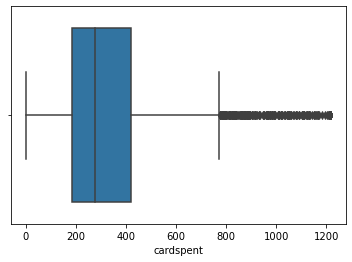

In [32]:
sns.boxplot(final["cardspent"])

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cardspent', ylabel='Density'>

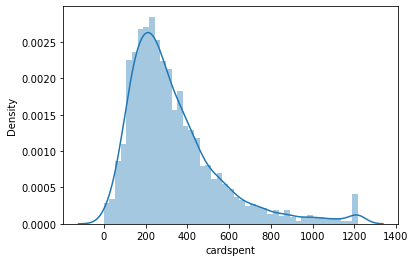

In [42]:
sns.distplot(final["cardspent"]) 

In [33]:
final.groupby(["region"]).agg({"age": ["min","mean", "count"]})

age                 
       min       mean count
region                     
1       18  47.922696  1009
2       18  47.075377   995
3       18  47.329013  1003
4       18  45.961698   966
5       18  46.800389  1027

In [400]:
final.groupby(["employ"]).agg({"carbuy": ["min","mean", "count"]})

carbuy                
          min      mean count
employ                       
0.0         0  0.350531   659
1.0         0  0.331620   389
2.0         0  0.339623   318
3.0         0  0.372168   309
4.0         0  0.354949   293
5.0         0  0.403846   260
6.0         0  0.356000   250
7.0         0  0.376963   191
8.0         0  0.320856   187
9.0         0  0.352273   176
10.0        0  0.341463   164
11.0        0  0.375000   184
12.0        0  0.391667   120
13.0        0  0.366412   131
14.0        0  0.451923   104
15.0        0  0.346154   130
16.0        0  0.421053    95
17.0        0  0.397849    93
18.0        0  0.428571    77
19.0        0  0.333333    84
20.0        0  0.265060    83
21.0        0  0.471698    53
22.0        0  0.423077    52
23.0        0  0.254545    55
24.0        0  0.285714    42
25.0        0  0.382979    47
26.0        0  0.261905    42
27.0        0  0.377778    45
28.0        0  0.310345    29
29.0        0  0.268293    41
30.0        0  0.350000    40
31.0        0  0.431818    44
32.0        0  0.392857    28
33.0        0  0.500000    26
34.0        0  0.379310    29
35.0        0  0.590909    22
36.0        0  0.333333    18
37.0        0  0.352941    17
38.0        0  0.444444    18
39.0        0  0.327273    55

In [401]:
#T test
#H0: region=income
#Ha: region!=income
#  CI : 95% , alpha Value 0.05 
# decision : If p value >= alpha : We accept null hypothesis 
#         If p value < alpha : we reject null hyp 

In [34]:
final["region"].value_counts()

5    1027
1    1009
3    1003
2     995
4     966
Name: region, dtype: int64

In [35]:
reg1=final[final["region"]==1]
regoth=final[final["region"]!=1]

In [36]:
from scipy import stats
stats.ttest_ind(reg1["income"], regoth["income"])

Ttest_indResult(statistic=-2.1630154320804924, pvalue=0.030587255118725544)

In [47]:
#p value is less than alpha  therefore we reject H0, this means that the region and income aren't the same

In [37]:
final["gender"].value_counts()

1    2518
0    2482
Name: gender, dtype: int64

In [38]:
final["cardspent"].value_counts()

1215.8072    50
0.0000        7
186.9100      4
237.1600      3
122.5400      3
             ..
469.5900      1
127.5500      1
190.7200      1
654.8500      1
269.7200      1
Name: cardspent, Length: 4711, dtype: int64

In [39]:
final.groupby(["gender"]).agg({"cardspent": ["min","mean", "count"]})

cardspent                  
             min        mean count
gender                            
0            0.0  348.195763  2482
1            0.0  318.823323  2518

In [409]:
#T test
#H0: gender=cardspent
#Ha: gender!=cardspent
#  CI : 95% , alpha Value 0.05 
# decision : If p value >= alpha : We accept null hypothesis 
#         If p value < alpha : we reject null hyp 

In [40]:
male=final[final["gender"]==0]
female=final[final["gender"]!=0]

In [41]:
stats.ttest_ind(male["cardspent"], female["cardspent"])

Ttest_indResult(statistic=4.694211838751811, pvalue=2.7479081088847816e-06)

In [412]:
#PValue is greater than alpha,so we accept H0, therefore male and female spend the same amount on card

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


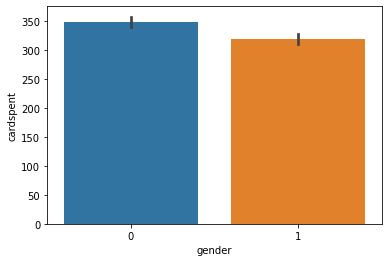

In [43]:
sns.barplot(data1["gender"], final["cardspent"])
plt.show()

In [414]:
#T test
#H0: homecat=income - If they rent, they have a lower income
#Ha: homecat!=income - If they own a home, they have a higher income
#  CI : 95% , alpha Value 0.05 
# decision : If p value >= alpha : We accept null hypothesis 
#         If p value < alpha : we reject null hyp 

In [44]:
rent=final[final["homeown"]==0]
own=final[final["homeown"]!=0]

In [45]:
stats.ttest_ind(rent["income"], rent["income"])

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [417]:
#pvalue > alpha, so we reject Ho, This mean that the higher the income, the more likely they are to own a home

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


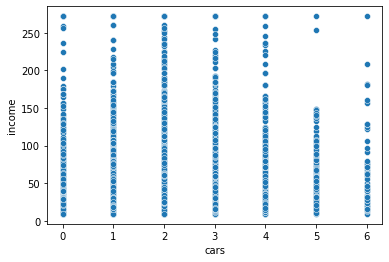

In [46]:
sns.scatterplot(final["cars"], final["income"])
plt.show()

In [47]:
final[["income", "cars"]].corr()

,income,cars
income,1.000000,0.044807
cars,0.044807,1.000000


In [48]:
final[["income", "cardspent"]].corr()

,income,cardspent
income,1.000000,0.355137
cardspent,0.355137,1.000000


In [49]:
final.groupby(["agecat"]).agg({"age": ["min","mean", "count"]})

age                 
       min       mean count
agecat                     
2       18  20.979100   622
3       25  29.459127   893
4       35  41.802782  1222
5       50  56.955649  1195
6       65  71.748127  1068

In [50]:
final["agecat"].value_counts()

4    1222
5    1195
6    1068
3     893
2     622
Name: agecat, dtype: int64

In [51]:
final[["gender", "cardspent"]].corr()

,gender,cardspent
gender,1.000000,-0.066254
cardspent,-0.066254,1.000000


In [424]:
# Check Assumptions 
# Y must be normally distributed
# No Multicollinearity 
# no Outlier 
# No Missing Value 

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


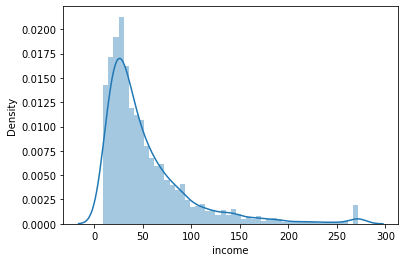

In [52]:
sns.distplot(final["income"])
plt.show()

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


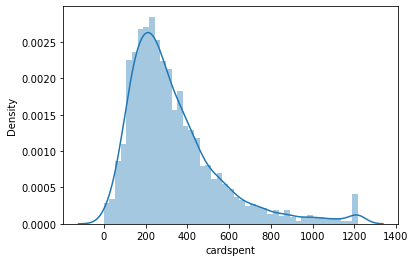

In [53]:
sns.distplot(final["cardspent"])
plt.show()

In [427]:
# # shapiro Test
# Null Hyp : data is normally distributed 
# Alter Hyp : Data is not Normally distributed 
# CI : 95%, Alpha : 0.05
# Decision : If Pvalue >= alpha : Accept Null Hypothesis 
#           If p Value < alpha : Accept Alternative Hypo

In [54]:
from scipy.stats import shapiro

In [55]:
shapiro(final["income"])

ShapiroResult(statistic=0.7624260783195496, pvalue=0.0)

In [56]:
shapiro(final["cardspent"])

ShapiroResult(statistic=0.8630676865577698, pvalue=0.0)

In [57]:
shapiro(final["card2type"])

ShapiroResult(statistic=0.8555339574813843, pvalue=0.0)

In [58]:
final["cardfinal"] = final["cardspent"] + final["card2spent"]

In [59]:
final1=final.drop(columns=["cardspent","card2spent"])

In [60]:
final.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,cardfinal
0,1,2.0,1,20,2,15.0,3,1,1,0.0,1,0,31.0,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1.0,-1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0.0,1,2.0,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,161.05,1,29.50,126.1,1,14.25,60.0,0,0.00,0.00,1,1,1,0,0,1,1,1,0,1,13.0,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,22,2,17.0,4,2,0,0.0,1,0,15.0,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1.0,-1,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1,3,2.0,1,2.0,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,0.00,1,54.85,1975.0,1,16.00,610.0,1,45.65,1683.55,1,1,1,4,1,0,1,0,1,1,18.0,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,3,4.0,1,67,6,14.0,2,2,0,16.0,5,0,35.0,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13.0,2,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,30.0,5,3.0,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,0.00,0,0.00,0.0,1,23.00,1410.0,0,0.00,0.00,1,0,0,0,0,0,0,0,0,1,21.0,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4,3.0,0,23,2,16.0,3,2,0,0.0,1,0,20.0,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18.0,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,3.0,2,3.0,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,0.00,0,0.00,0.0,1,21.00,685.0,0,0.00,0.00,1,0,0,2,0,0,0,0,1,1,26.0,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,2,2.0,0,26,3,16.0,3,2,0,1.0,1,0,23.0,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13.0,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,3.0,2,1.0,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,387.70,0,0.00,0.0,1,17.25,360.0,1,19.05,410.80,0,1,0,3,1,1,1,1,0,1,27.0,1,1,1,0,1,0,1,0,0,0,1,0,507.83


In [ ]:
#use vif

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
final1

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,tollten,equip,equipmon,equipten,callcard,cardmon,cardten,wireless,wiremon,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,cardfinal
0,1,2.0,1,20,2,15.0,3,1,1,0.0,1,0,31.0,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1.0,-1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,0.0,1,2.0,1,0,14.300,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,161.05,1,29.50,126.10,1,14.25,60.0,0,0.00,0.00,1,1,1,0,0,1,1,1,0,1,13.0,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,22,2,17.0,4,2,0,0.0,1,0,15.0,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1.0,-1,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1,3,2.0,1,2.0,1,1,6.800,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,0.00,1,54.85,1975.00,1,16.00,610.0,1,45.65,1683.55,1,1,1,4,1,0,1,0,1,1,18.0,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,3,4.0,1,67,6,14.0,2,2,0,16.0,5,0,35.0,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13.0,2,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,30.0,5,3.0,1,1,18.800,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,0.00,0,0.00,0.00,1,23.00,1410.0,0,0.00,0.00,1,0,0,0,0,0,0,0,0,1,21.0,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4,3.0,0,23,2,16.0,3,2,0,0.0,1,0,20.0,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18.0,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,3.0,2,3.0,1,1,8.700,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,0.00,0,0.00,0.00,1,21.00,685.0,0,0.00,0.00,1,0,0,2,0,0,0,0,1,1,26.0,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,2,2.0,0,26,3,16.0,3,2,0,1.0,1,0,23.0,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13.0,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,3.0,2,1.0,0,1,10.600,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,387.70,0,0.00,0.00,1,17.25,360.0,1,19.05,410.80,0,1,0,3,1,1,1,1,0,1,27.0,1,1,1,0,1,0,1,0,0,0,1,0,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,68,6,10.0,1,1,0,24.0,5,0,196.0,5.278115,5,8.0,7.934080,2.071167,7.745920,2.047166,0,1,0,-1.0,-1,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,24.0,4,1.0,1,0,64.500,3,0,0,5,3,21.0,0,0,0,0,1,0,0,0,0,0,9,4,0,1,1,1,3,3,0,35,5,3,3,4,0,28,5,0,2,69,0,34.10,3.529297,2405.90,7.785679,0,0.0,0.00,0,0.00,0.00,1,21.75,1565.0,0,0.00,0.00,0,0,0,0,0,0,0,0,0,1,19.0,1,1,1,0,0,0,0,0,1,0,0,0,1425.67
4996,3,3.0,0,51,5,14.0,2,1,0,6.0,3,0,83.0,4.418841,4,15.0,3.336600,1.204952,9.113400,2.209746,1,5,0,-1.0,-1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,12.0,3,2.0,1,1,

In [63]:
final2=final1

In [64]:
X=final2[["edcat","jobcat","union", "creddebt", "lncreddebt", "lnothdebt", "default",
         "spousedcat","reside", "pets", "homeown", "hometype", "cars", "carown", "cartype","carvalue",
         "carbought", "carbuy", "commute", "reason","polview", "polparty", "polcontrib", "vote",
         "active", "bfast", "churn", "equip", "cardmon","wireless","wireten", "multline", "voice","internet"]]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["features"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i)
                for i in range(len(X.columns))]

print (vif_data.sort_values(by=["VIF"],ascending=False))

      features       VIF
20     polview  8.057941
0        edcat  7.911385
19      reason  7.152280
25       bfast  6.826763
12        cars  6.073403
8       reside  5.605090
15    carvalue  5.040843
11    hometype  4.719514
13      carown  4.460360
3     creddebt  4.403831
29    wireless  4.007198
1       jobcat  3.556097
4   lncreddebt  3.080092
33    internet  3.070251
18     commute  2.971889
5    lnothdebt  2.962496
30     wireten  2.887841
10     homeown  2.792325
27       equip  2.719517
32       voice  2.609546
31    multline  2.558685
28     cardmon  2.537411
23        vote  2.133372
14     cartype  2.087501
24      active  1.973891
16   carbought  1.949029
9         pets  1.819033
7   spousedcat  1.778902
17      carbuy  1.668180
26       churn  1.658435
21    polparty  1.642757
6      default  1.619165
22  polcontrib  1.330822
2        union  1.193400


In [65]:
final2.drop(columns=["age","address"], inplace=True)

In [66]:
final2["bfast"].value_counts()

3    1875
1    1582
2    1543
Name: bfast, dtype: int64

In [67]:
final2["callcard"].value_counts()

1    3581
0    1419
Name: callcard, dtype: int64

In [68]:
final2["callid"].value_counts()

0    2624
1    2376
Name: callid, dtype: int64

In [69]:
final2["callwait"].value_counts()

0    2605
1    2395
Name: callwait, dtype: int64

In [70]:
final2["carbought"].value_counts()

 0    2901
 1    1602
-1     497
Name: carbought, dtype: int64

In [71]:
final2["carbuy"].value_counts()

0    3195
1    1805
Name: carbuy, dtype: int64

In [72]:
final2["commute"].value_counts()

1     2855
4      635
8      585
5      302
3      295
10     153
7       56
2       50
6       44
9       25
Name: commute, dtype: int64

In [73]:
final2["commutebike"].value_counts()

0    4383
1     617
Name: commutebike, dtype: int64

In [74]:
final2["employ"].value_counts()

0.0     659
1.0     389
2.0     318
3.0     309
4.0     293
5.0     260
6.0     250
7.0     191
8.0     187
11.0    184
9.0     176
10.0    164
13.0    131
15.0    130
12.0    120
14.0    104
16.0     95
17.0     93
19.0     84
20.0     83
18.0     77
23.0     55
39.0     55
21.0     53
22.0     52
25.0     47
27.0     45
31.0     44
26.0     42
24.0     42
29.0     41
30.0     40
28.0     29
34.0     29
32.0     28
33.0     26
35.0     22
36.0     18
38.0     18
37.0     17
Name: employ, dtype: int64

In [75]:
import scipy.stats as smf

In [76]:
 import statsmodels.api as sm

In [77]:
y=final2["cardfinal"]
x=final2.drop(columns=["cardfinal"])

In [79]:
x.columns.to_list()

['region',
 'townsize',
 'gender',
 'agecat',
 'ed',
 'edcat',
 'jobcat',
 'union',
 'employ',
 'empcat',
 'retire',
 'income',
 'lninc',
 'inccat',
 'debtinc',
 'creddebt',
 'lncreddebt',
 'othdebt',
 'lnothdebt',
 'default',
 'jobsat',
 'marital',
 'spoused',
 'spousedcat',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'homeown',
 'hometype',
 'addresscat',
 'cars',
 'carown',
 'cartype',
 'carvalue',
 'carcatvalue',
 'carbought',
 'carbuy',
 'commute',
 'commutecat',
 'commutetime',
 'commutecar',
 'commutemotorcycle',
 'commutecarpool',
 'commutebus',
 'commuterail',
 'commutepublic',
 'commutebike',
 'commutewalk',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polview',
 'polparty',
 'polcontrib',
 'vote',
 'card',
 'cardtype',
 'cardbenefit',
 'cardfee',
 'cardtenure',
 'cardtenurecat',
 'card2',
 'card2type',
 'card2benefit',
 'card2fee',
 'card2tenure',
 'card2tenurecat',
 'active',
 'bfa

In [80]:
x = sm.add_constant(x)

C:\Users\sarit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [84]:
result = sm.OLS(y, x).fit()

In [85]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              cardfinal   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     15.65
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          1.98e-251
Time:                        10:09:49   Log-Likelihood:                -35140.
No. Observations:                5000   AIC:                         7.051e+04
Df Residuals:                    4883   BIC:                         7.128e+04
Df Model:                         116                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               451.8501    101.62

In [86]:
from sklearn.feature_selection import chi2

In [87]:
import scipy.stats as sp

In [88]:
tb=pd.crosstab(final2["empcat"], final1["employ"])

In [90]:
sp.chi2_contingency(tb)

(20000.0,
 0.0,
 156,
 array([[138.1264,  81.5344,  66.6528,  64.7664,  61.4128,  54.496 ,
          52.4   ,  40.0336,  39.1952,  36.8896,  34.3744,  38.5664,
          25.152 ,  27.4576,  21.7984,  27.248 ,  19.912 ,  19.4928,
          16.1392,  17.6064,  17.3968,  11.1088,  10.8992,  11.528 ,
           8.8032,   9.8512,   8.8032,   9.432 ,   6.0784,   8.5936,
           8.384 ,   9.2224,   5.8688,   5.4496,   6.0784,   4.6112,
           3.7728,   3.5632,   3.7728,  11.528 ],
        [155.524 ,  91.804 ,  75.048 ,  72.924 ,  69.148 ,  61.36  ,
          59.    ,  45.076 ,  44.132 ,  41.536 ,  38.704 ,  43.424 ,
          28.32  ,  30.916 ,  24.544 ,  30.68  ,  22.42  ,  21.948 ,
          18.172 ,  19.824 ,  19.588 ,  12.508 ,  12.272 ,  12.98  ,
           9.912 ,  11.092 ,   9.912 ,  10.62  ,   6.844 ,   9.676 ,
           9.44  ,  10.384 ,   6.608 ,   6.136 ,   6.844 ,   5.192 ,
           4.248 ,   4.012 ,   4.248 ,  12.98  ],
        [127.5824,  75.3104,  61.5648,  59.8224,  

In [91]:
final2[["employ", "empcat"]].corr()

,employ,empcat
employ,1.000000,0.903591
empcat,0.903591,1.000000


In [92]:
final2.drop(columns=["employ"],inplace=True)

In [93]:
final1["cardten"]

0         60.0
1        610.0
2       1410.0
3        685.0
4        360.0
         ...  
4995    1565.0
4996     800.0
4997    1070.0
4998     345.0
4999     260.0
Name: cardten, Length: 5000, dtype: float64

In [99]:
#pd.DataFrame(final1.columns).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

In [94]:
tb1=pd.crosstab(final2["homeown"], final1["hometype"])

In [95]:
sp.chi2_contingency(tb1)

(2629.8392819207384,
 0.0,
 3,
 array([[ 838.956 ,  573.3792,  331.8784,  107.7864],
        [1426.044 ,  974.6208,  564.1216,  183.2136]]))

In [96]:
final2[["homeown", "hometype"]].corr()

,homeown,hometype
homeown,1.000000,-0.048121
hometype,-0.048121,1.000000


In [97]:
tb2=pd.crosstab(final2["region"], final1["townsize"])

In [98]:
sp.chi2_contingency(tb2)

(983.833681806237,
 3.237824390759202e-199,
 16,
 array([[289.7848, 211.4864, 183.4362, 172.9426, 151.35  ],
        [285.764 , 208.552 , 180.891 , 170.543 , 149.25  ],
        [288.0616, 210.2288, 182.3454, 171.9142, 150.45  ],
        [277.4352, 202.4736, 175.6188, 165.5724, 144.9   ],
        [294.9544, 215.2592, 186.7086, 176.0278, 154.05  ]]))

In [99]:
final1[["region", "townsize"]].corr()

,region,townsize
region,1.000000,0.414026
townsize,0.414026,1.000000


In [100]:
tb3=pd.crosstab(final2["income"], final1["inccat"])

In [101]:
sp.chi2_contingency(tb3)

(20000.0,
 0.0,
 888,
 array([[22.078 , 29.8302, 13.9274, 10.79  ,  6.3744],
        [14.63  , 19.767 ,  9.229 ,  7.15  ,  4.224 ],
        [15.162 , 20.4858,  9.5646,  7.41  ,  4.3776],
        ...,
        [ 0.798 ,  1.0782,  0.5034,  0.39  ,  0.2304],
        [ 0.266 ,  0.3594,  0.1678,  0.13  ,  0.0768],
        [13.3   , 17.97  ,  8.39  ,  6.5   ,  3.84  ]]))

In [102]:
final2[["income", "inccat"]].corr()

,income,inccat
income,1.000000,0.890702
inccat,0.890702,1.000000


In [103]:
final2.drop(columns=["income"],inplace=True)

In [104]:
tb5=pd.crosstab(final2["carbought"], final1["carbuy"])

In [105]:
sp.chi2_contingency(tb5)

(386.82815567401406,
 1.003074691690483e-84,
 2,
 array([[ 317.583,  179.417],
        [1853.739, 1047.261],
        [1023.678,  578.322]]))

In [106]:
final2[["carbought", "carbuy"]].corr()

,carbought,carbuy
carbought,1.000000,-0.207095
carbuy,-0.207095,1.000000


In [107]:
tb4=pd.crosstab(final2["spoused"], final1["spousedcat"])

In [108]:
sp.chi2_contingency(tb4)

(25000.0,
 0.0,
 85,
 array([[1.3509602e+03, 3.1499880e+02, 4.1012220e+02, 2.6353860e+02,
         2.0480120e+02, 5.4579000e+01],
        [5.1980000e-01, 1.2120000e-01, 1.5780000e-01, 1.0140000e-01,
         7.8800000e-02, 2.1000000e-02],
        [2.0792000e+00, 4.8480000e-01, 6.3120000e-01, 4.0560000e-01,
         3.1520000e-01, 8.4000000e-02],
        [7.2772000e+00, 1.6968000e+00, 2.2092000e+00, 1.4196000e+00,
         1.1032000e+00, 2.9400000e-01],
        [1.8712800e+01, 4.3632000e+00, 5.6808000e+00, 3.6504000e+00,
         2.8368000e+00, 7.5600000e-01],
        [3.6386000e+01, 8.4840000e+00, 1.1046000e+01, 7.0980000e+00,
         5.5160000e+00, 1.4700000e+00],
        [5.5618600e+01, 1.2968400e+01, 1.6884600e+01, 1.0849800e+01,
         8.4316000e+00, 2.2470000e+00],
        [7.3291800e+01, 1.7089200e+01, 2.2249800e+01, 1.4297400e+01,
         1.1110800e+01, 2.9610000e+00],
        [1.2111340e+02, 2.8239600e+01, 3.6767400e+01, 2.3626200e+01,
         1.8360400e+01, 4.8930000e+00]

In [109]:
final2[["spoused", "spousedcat"]].corr()

,spoused,spousedcat
spoused,1.000000,0.983148
spousedcat,0.983148,1.000000


In [110]:
final2.drop(columns=["spoused"],inplace=True)

In [111]:
tb6=pd.crosstab(final2["cars"], final2["carown"])

In [112]:
sp.chi2_contingency(tb6)

(5014.40021159647,
 0.0,
 12,
 array([[  49.4018,   79.4206,  368.1776],
        [ 111.2286,  178.8162,  828.9552],
        [ 159.7358,  256.7986, 1190.4656],
        [ 107.5508,  172.9036,  801.5456],
        [  47.8114,   76.8638,  356.3248],
        [  14.8106,   23.8102,  110.3792],
        [   6.461 ,   10.387 ,   48.152 ]]))

In [113]:
final2[["cars", "carown"]].corr()

,cars,carown
cars,1.000000,0.475346
carown,0.475346,1.000000


In [114]:
tb7=pd.crosstab(final2["equipmon"], final1["equipten"])

In [115]:
sp.chi2_contingency(tb7)

(3278652.1666666674,
 0.0,
 1121871,
 array([[2.1727232e+03, 6.5920000e-01, 6.5920000e-01, ..., 6.5920000e-01,
         6.5920000e-01, 3.2960000e+01],
        [6.5920000e-01, 2.0000000e-04, 2.0000000e-04, ..., 2.0000000e-04,
         2.0000000e-04, 1.0000000e-02],
        [6.5920000e-01, 2.0000000e-04, 2.0000000e-04, ..., 2.0000000e-04,
         2.0000000e-04, 1.0000000e-02],
        ...,
        [6.5920000e-01, 2.0000000e-04, 2.0000000e-04, ..., 2.0000000e-04,
         2.0000000e-04, 1.0000000e-02],
        [6.5920000e-01, 2.0000000e-04, 2.0000000e-04, ..., 2.0000000e-04,
         2.0000000e-04, 1.0000000e-02],
        [3.2960000e+01, 1.0000000e-02, 1.0000000e-02, ..., 1.0000000e-02,
         1.0000000e-02, 5.0000000e-01]]))

In [116]:
tb8=pd.crosstab(final2["edcat"], final2["ed"])

In [117]:
sp.chi2_contingency(tb8)

(20000.0,
 0.0,
 60,
 array([[  1.5136,   5.8652,  20.2444,  33.6776,  49.192 ,  68.4904,
          88.3564, 100.4652, 107.6548, 101.4112,  91.9512,  85.8968,
          66.0308,  58.2736,  38.9752,  28.0016],
        [  2.5072,   9.7154,  33.5338,  55.7852,  81.484 , 113.4508,
         146.3578, 166.4154, 178.3246, 167.9824, 152.3124, 142.2836,
         109.3766,  96.5272,  64.5604,  46.3832],
        [  1.6352,   6.3364,  21.8708,  36.3832,  53.144 ,  73.9928,
          95.4548, 108.5364, 116.3036, 109.5584,  99.3384,  92.7976,
          71.3356,  62.9552,  42.1064,  30.2512],
        [  1.7776,   6.8882,  23.7754,  39.5516,  57.772 ,  80.4364,
         103.7674, 117.9882, 126.4318, 119.0992, 107.9892, 100.8788,
          77.5478,  68.4376,  45.7732,  32.8856],
        [  0.5664,   2.1948,   7.5756,  12.6024,  18.408 ,  25.6296,
          33.0636,  37.5948,  40.2852,  37.9488,  34.4088,  32.1432,
          24.7092,  21.8064,  14.5848,  10.4784]]))

In [118]:
final2[["ed", "edcat"]].corr()

,ed,edcat
ed,1.000000,0.964293
edcat,0.964293,1.000000


In [119]:
final2.drop(columns=["ed"],inplace=True)

In [120]:
final2["debtinc"].value_counts()

29.2    53
7.0     48
4.1     46
6.9     46
5.4     45
4.4     42
6.6     42
7.3     41
5.9     39
11.3    39
10.1    38
8.2     38
9.3     38
7.7     38
5.5     38
9.6     38
7.5     38
5.7     38
5.8     37
5.0     37
7.4     37
7.2     37
6.4     37
5.6     37
4.2     37
10.4    36
3.6     36
3.9     36
5.1     36
6.0     36
8.5     35
4.9     35
10.5    35
4.7     35
6.1     35
6.5     35
10.9    34
5.2     34
2.8     34
9.7     33
6.7     33
7.8     33
8.4     33
4.5     33
4.8     33
2.5     32
9.5     32
10.6    32
10.2    32
8.1     32
3.1     32
9.0     32
4.3     31
10.8    31
2.6     31
6.8     31
11.5    31
11.9    31
9.9     31
2.3     31
8.9     31
8.0     30
5.3     30
14.3    30
2.9     30
2.0     29
3.5     29
6.3     29
3.7     29
2.1     28
8.3     28
4.6     28
8.6     28
9.2     28
11.4    27
10.3    27
7.9     27
8.7     27
12.2    27
3.0     27
10.0    26
11.6    26
12.7    26
3.3     26
6.2     26
3.8     25
3.4     25
1.5     25
9.4     25
3.2     25
11.7    25

In [121]:
tb9=pd.crosstab(final2["debtinc"], final2["lncreddebt"])

In [122]:
sp.chi2_contingency(tb9)

(1380294.0123623402,
 1.0,
 1398826,
 array([[2.00e-04, 2.00e-04, 2.00e-04, ..., 2.00e-04, 2.00e-04, 1.00e-02],
        [1.20e-03, 1.20e-03, 1.20e-03, ..., 1.20e-03, 1.20e-03, 6.00e-02],
        [4.00e-04, 4.00e-04, 4.00e-04, ..., 4.00e-04, 4.00e-04, 2.00e-02],
        ...,
        [4.00e-04, 4.00e-04, 4.00e-04, ..., 4.00e-04, 4.00e-04, 2.00e-02],
        [2.00e-04, 2.00e-04, 2.00e-04, ..., 2.00e-04, 2.00e-04, 1.00e-02],
        [1.06e-02, 1.06e-02, 1.06e-02, ..., 1.06e-02, 1.06e-02, 5.30e-01]]))

In [123]:
final1[["debtinc", "lncreddebt"]].corr()

,debtinc,lncreddebt
debtinc,1.000000,0.551506
lncreddebt,0.551506,1.000000


In [124]:
tb10=pd.crosstab(final2["lnlongten"], final2["longten"])

In [125]:
sp.chi2_contingency(tb10)

(21934999.99999994,
 0.0,
 19245769,
 array([[8.e-04, 4.e-04, 4.e-04, ..., 4.e-04, 4.e-04, 2.e-02],
        [4.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [4.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        ...,
        [4.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [4.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [2.e-02, 1.e-02, 1.e-02, ..., 1.e-02, 1.e-02, 5.e-01]]))

In [126]:
final2[["lnlongten", "longten"]].corr()

,lnlongten,longten
lnlongten,1.000000,0.743384
longten,0.743384,1.000000


In [127]:
final2.drop(columns=["longten"],inplace=True)

In [128]:
tb11=pd.crosstab(final2["lnlongmon"], final2["longmon"])

In [129]:
sp.chi2_contingency(tb11)

(4090000.0000000005,
 0.0,
 669124,
 array([[8.e-04, 4.e-04, 4.e-04, ..., 4.e-04, 4.e-04, 2.e-02],
        [4.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [4.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        ...,
        [4.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [4.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [2.e-02, 1.e-02, 1.e-02, ..., 1.e-02, 1.e-02, 5.e-01]]))

In [130]:
final2[["lnlongmon", "longmon"]].corr()

,lnlongmon,longmon
lnlongmon,1.000000,0.891211
longmon,0.891211,1.000000


In [131]:
final2.drop(columns=["lnlongmon"],inplace=True)

In [132]:
tb12=pd.crosstab(final2["lnothdebt"], final2["othdebt"])

In [133]:
sp.chi2_contingency(tb12)

(24610000.000000123,
 0.0,
 24231006,
 array([[2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        ...,
        [2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [1.e-02, 1.e-02, 1.e-02, ..., 1.e-02, 1.e-02, 5.e-01]]))

In [134]:
final2[["lnothdebt", "othdebt"]].corr()

,lnothdebt,othdebt
lnothdebt,1.000000,0.800226
othdebt,0.800226,1.000000


In [135]:
final2.drop(columns=["lnothdebt"],inplace=True)

In [136]:
pd.DataFrame(final2.columns).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

,0
0,region
1,townsize
2,gender
3,agecat
4,edcat
5,jobcat
6,union
7,empcat
8,retire
9,lninc


In [137]:
tb13=pd.crosstab(final2["lninc"], final2["inccat"])

In [138]:
sp.chi2_contingency(tb13)

(20000.0,
 0.0,
 888,
 array([[22.078 , 29.8302, 13.9274, 10.79  ,  6.3744],
        [14.63  , 19.767 ,  9.229 ,  7.15  ,  4.224 ],
        [15.162 , 20.4858,  9.5646,  7.41  ,  4.3776],
        ...,
        [ 0.798 ,  1.0782,  0.5034,  0.39  ,  0.2304],
        [ 0.266 ,  0.3594,  0.1678,  0.13  ,  0.0768],
        [13.3   , 17.97  ,  8.39  ,  6.5   ,  3.84  ]]))

In [139]:
final2[["lninc", "inccat"]].corr()

,lninc,inccat
lninc,1.000000,0.951539
inccat,0.951539,1.000000


In [140]:
final2.drop(columns=["lninc"],inplace=True)

In [141]:
tb14=pd.crosstab(final1["card2tenure"], final1["card2tenurecat"])

In [142]:
sp.chi2_contingency(tb14)

(20000.0,
 0.0,
 120,
 array([[  6.497 ,  18.1382,  16.6074,  13.528 ,  34.2294],
        [ 20.148 ,  56.2488,  51.5016,  41.952 , 106.1496],
        [ 22.192 ,  61.9552,  56.7264,  46.208 , 116.9184],
        [ 18.907 ,  52.7842,  48.3294,  39.368 ,  99.6114],
        [ 18.25  ,  50.95  ,  46.65  ,  38.    ,  96.15  ],
        [ 15.038 ,  41.9828,  38.4396,  31.312 ,  79.2276],
        [ 15.184 ,  42.3904,  38.8128,  31.616 ,  79.9968],
        [ 14.6   ,  40.76  ,  37.32  ,  30.4   ,  76.92  ],
        [ 12.921 ,  36.0726,  33.0282,  26.904 ,  68.0742],
        [ 12.191 ,  34.0346,  31.1622,  25.384 ,  64.2282],
        [ 13.213 ,  36.8878,  33.7746,  27.512 ,  69.6126],
        [ 10.147 ,  28.3282,  25.9374,  21.128 ,  53.4594],
        [ 12.41  ,  34.646 ,  31.722 ,  25.84  ,  65.382 ],
        [ 10.877 ,  30.3662,  27.8034,  22.648 ,  57.3054],
        [ 11.023 ,  30.7738,  28.1766,  22.952 ,  58.0746],
        [ 11.023 ,  30.7738,  28.1766,  22.952 ,  58.0746],
        [ 10.439 ,

In [143]:
final2[["cardtenure", "cardtenurecat"]].corr()

,cardtenure,cardtenurecat
cardtenure,1.000000,0.865494
cardtenurecat,0.865494,1.000000


In [144]:
final2.drop(columns=["cardtenure","card2tenure"],inplace=True)

In [145]:
final2["card"].value_counts()

4    1344
2    1247
3    1200
1     986
5     223
Name: card, dtype: int64

In [146]:
tb15=pd.crosstab(final2["carcatvalue"], final1["carvalue"])

In [147]:
sp.chi2_contingency(tb15)

(15000.000000000002,
 0.0,
 2298,
 array([[4.940180e+01, 9.940000e-02, 9.940000e-02, ..., 9.940000e-02,
         9.940000e-02, 4.970000e+00],
        [2.384606e+02, 4.798000e-01, 4.798000e-01, ..., 4.798000e-01,
         4.798000e-01, 2.399000e+01],
        [1.259398e+02, 2.534000e-01, 2.534000e-01, ..., 2.534000e-01,
         2.534000e-01, 1.267000e+01],
        [8.319780e+01, 1.674000e-01, 1.674000e-01, ..., 1.674000e-01,
         1.674000e-01, 8.370000e+00]]))

In [148]:
final2[["carvalue", "carcatvalue"]].corr()

,carvalue,carcatvalue
carvalue,1.000000,0.838964
carcatvalue,0.838964,1.000000


In [149]:
final2.drop(columns=["carvalue"],inplace=True)

In [161]:
#pd.DataFrame(final2.columns).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

In [147]:
#final2.drop(columns=["age","employ","income","longmon", "longmon", "longten", "spoused","ed","othdebt"], inplace=True)

In [174]:
#final2.drop(columns=["lninc"],inplace=True)

In [168]:
#pd.DataFrame(final2.columns).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

In [150]:
tb17=pd.crosstab(final2["commute"], final1["commutecat"])

In [151]:
sp.chi2_contingency(tb17)

(19999.999999999996,
 0.0,
 36,
 array([[1.658755e+03, 1.684450e+02, 5.601510e+02, 3.802860e+02,
         8.736300e+01],
        [2.905000e+01, 2.950000e+00, 9.810000e+00, 6.660000e+00,
         1.530000e+00],
        [1.713950e+02, 1.740500e+01, 5.787900e+01, 3.929400e+01,
         9.027000e+00],
        [3.689350e+02, 3.746500e+01, 1.245870e+02, 8.458200e+01,
         1.943100e+01],
        [1.754620e+02, 1.781800e+01, 5.925240e+01, 4.022640e+01,
         9.241200e+00],
        [2.556400e+01, 2.596000e+00, 8.632800e+00, 5.860800e+00,
         1.346400e+00],
        [3.253600e+01, 3.304000e+00, 1.098720e+01, 7.459200e+00,
         1.713600e+00],
        [3.398850e+02, 3.451500e+01, 1.147770e+02, 7.792200e+01,
         1.790100e+01],
        [1.452500e+01, 1.475000e+00, 4.905000e+00, 3.330000e+00,
         7.650000e-01],
        [8.889300e+01, 9.027000e+00, 3.001860e+01, 2.037960e+01,
         4.681800e+00]]))

In [152]:
final2[["commute", "commutecat"]].corr()

,commute,commutecat
commute,1.000000,0.981171
commutecat,0.981171,1.000000


In [153]:
final2.drop(columns=["commutecat"],inplace=True)

In [154]:
tb18=pd.crosstab(final2["wireless"], final1["wiremon"])

In [155]:
sp.chi2_contingency(tb18)

(5000.000000000001,
 0.0,
 698,
 array([[2.6732672e+03, 7.3120000e-01, 7.3120000e-01, ..., 7.3120000e-01,
         7.3120000e-01, 3.6560000e+01],
        [9.8273280e+02, 2.6880000e-01, 2.6880000e-01, ..., 2.6880000e-01,
         2.6880000e-01, 1.3440000e+01]]))

In [156]:
final2[["wireless", "wiremon"]].corr()

,wireless,wiremon
wireless,1.00000,0.91316
wiremon,0.91316,1.00000


In [157]:
final2["wiremon"].value_counts()

0.000     3656
78.304      50
34.300       9
32.200       7
22.950       7
          ... 
51.850       1
64.350       1
22.550       1
28.450       1
52.700       1
Name: wiremon, Length: 699, dtype: int64

In [158]:
final2["wireless"].value_counts()

0    3656
1    1344
Name: wireless, dtype: int64

In [159]:
final2.drop(columns=["wiremon"], inplace=True)

In [160]:
final2["wireten"].value_counts()

0.000       3656
4530.186      50
2182.050       2
2049.850       2
23.150         2
            ... 
4010.750       1
924.500        1
2959.600       1
4202.400       1
757.350        1
Name: wireten, Length: 1279, dtype: int64

In [161]:
tb19=pd.crosstab(final2["wireless"], final1["wireten"])

In [162]:
sp.chi2_contingency(tb19)

(5000.000000000002,
 0.0,
 1278,
 array([[2.6732672e+03, 7.3120000e-01, 7.3120000e-01, ..., 7.3120000e-01,
         7.3120000e-01, 3.6560000e+01],
        [9.8273280e+02, 2.6880000e-01, 2.6880000e-01, ..., 2.6880000e-01,
         2.6880000e-01, 1.3440000e+01]]))

In [163]:
final2[["wireless", "wireten"]].corr()

,wireless,wireten
wireless,1.000000,0.727113
wireten,0.727113,1.000000


In [164]:
final2.drop(columns=["wireten"], inplace=True)

In [165]:
final2["equipmon"].value_counts()

0.0000     3296
63.3005      50
38.8000       8
31.1500       8
32.3000       8
           ... 
56.4500       1
48.7000       1
59.4500       1
39.3000       1
25.3000       1
Name: equipmon, Length: 688, dtype: int64

In [166]:
final2["equip"].value_counts()

0    3296
1    1704
Name: equip, dtype: int64

In [167]:
tb20=pd.crosstab(final2["equip"], final1["equipmon"])

In [168]:
sp.chi2_contingency(tb20)

(5000.0,
 0.0,
 687,
 array([[2.1727232e+03, 6.5920000e-01, 6.5920000e-01, ..., 6.5920000e-01,
         6.5920000e-01, 3.2960000e+01],
        [1.1232768e+03, 3.4080000e-01, 3.4080000e-01, ..., 3.4080000e-01,
         3.4080000e-01, 1.7040000e+01]]))

In [169]:
final2[["equip", "equipmon"]].corr()

,equip,equipmon
equip,1.000000,0.947194
equipmon,0.947194,1.000000


In [170]:
final2.drop(columns=["equipmon","equipten"])

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,lncreddebt,othdebt,default,jobsat,marital,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongten,tollfree,tollmon,tollten,equip,callcard,cardmon,cardten,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,cardfinal
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,0.183079,2.240091,1,1,0,-1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,1,2.0,1,0,1,0,0,8,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,5,3,1,0,2,0,3,5,1,6.50,3.538057,1,29.0,161.05,1,1,14.25,60.0,0,1,1,1,0,0,1,1,1,0,1,13.0,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,0.200505,1.567980,1,1,0,-1,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1,3,1,2.0,1,1,1,0,0,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,2,4,1,3,0,2,1,1,39,0,8.90,5.800909,0,0.0,0.00,1,1,16.00,610.0,1,1,1,1,4,1,0,1,0,1,1,18.0,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,-0.074056,2.536380,0,4,1,2,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,5,3.0,1,1,1,0,1,4,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,5,4,1,3,0,5,0,3,65,0,28.40,7.527444,0,0.0,0.00,0,1,23.00,1410.0,0,1,0,0,0,0,0,0,0,0,1,21.0,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,-3.780995,1.117200,1,2,1,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2,3.0,1,1,1,0,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,2,3,2,4,0,2,1,1,36,0,6.00,5.295564,0,0.0,0.00,0,1,21.00,685.0,0,1,0,0,2,0,0,0,0,1,1,26.0,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,-1.538705,0.176341,0,1,1,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2,1.0,0,1,1,0,1,6,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,3,1,3,2,0,3,1,3,21,0,3.05,4.305416,1,16.5,387.70,0,1,17.25,360.0,1,0,1,0,3,1,1,1,1,0,1,27.0,1,1,1,0,1,0,1,0,0,0,1,0,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,5,0,5,8.0,7.934080,2.071167,7.745920,0,1,0,-1,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4,1.0,1,0,3,0,0,5,21.0,0,0,0,0,1,0,0,0,0,0,9,4,0,1,1,1,3,3,0,5,3,3,4,0,5,0,2,69,0,34.10,7.785679,0,0.0,0.00,0,1,21.75,1565.0,0,0,0,0,0,0,0,0,0,0,1,19.0,1,1,1,0,0,0,0,0,1,0,0,0,1425.67
4996,3,3.0,0,5,2,1,0,3,0,4,15.0,3.336600,1.204952,9.113400,1,5,0,-1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,3,2.0,1,1,3,1,1,4,26.0,1,0,0,1,0,1,0,0,0,0,9,4,0,0,0,3,4,4,0,4,5,1,2,0,4,1,1,30,0,10.40,5.666427,1,36.5,1157.20,0,1,26.25,800.0,1,0,0,0,0,1,1,1,1,0,1,14.0,1,1,1,0,0,0,0,0,0,0,0,0,366.35
4997,4,5.0,0,6,4,1,0,5,0,4,10.8,3.557520,1.269064,8.106480,0,3,0,-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,5,3.0,1,0,3,1,0,1,32.0,1,0,1,1,0,0,0,1,0,0,9,4,0,0,0,1,3,1,0,5,2,4,4,0,5,0,3,72,0,29.40,7.654088,1,44.0,3322.50,0,1,15.25,1070.0,0,1,0,0,0,1,1,1,1,0,1,16.0,1,1,1,1,0,0,0,0,1,0,0,0,1527.75
4998,1,1.0,0,4,4,2,0,2,0,5,10.8,5.021352,1.613699,15.390648,1,4,1,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4,2.0,1,1,3,1,1,1,12.0,1,0,0,0,1,0,0,0,0,0,9,2,1,1,0,3,1,1,0,5,4,3,1,0,4,0,3,37,0,7.95,5.644386,0,0.0,0.00,1,1,9.50,345.0,0,1,0,0,3,0,0,0,0,1,1,24.0,1,1,1,0,1,1,1,0,1,0,0,0,752.95


In [171]:
final2["tollfree"].value_counts()

0    2622
1    2378
Name: tollfree, dtype: int64

In [172]:
final2["tollmon"].value_counts()

0.0000     2622
58.7525      50
22.7500      33
18.0000      33
24.0000      32
23.0000      31
22.0000      30
23.7500      30
19.5000      29
19.0000      29
20.0000      29
19.7500      28
17.0000      28
20.2500      27
17.5000      27
20.5000      27
17.7500      27
25.0000      27
24.5000      26
25.2500      26
21.0000      26
28.7500      26
23.5000      26
15.7500      26
25.5000      24
23.2500      24
24.7500      24
20.7500      24
22.2500      23
18.7500      23
21.2500      23
21.5000      23
26.5000      23
30.5000      22
29.5000      22
32.5000      22
27.2500      21
16.5000      21
28.0000      21
16.7500      20
26.7500      20
22.5000      20
31.0000      20
24.2500      20
25.7500      19
15.2500      19
36.5000      19
28.2500      19
18.2500      19
29.2500      18
33.5000      18
35.5000      18
31.5000      18
18.5000      18
21.7500      18
34.5000      18
16.0000      18
13.2500      18
26.0000      18
16.2500      18
29.7500      17
19.2500      17
31.2500 

In [173]:
final2["tollten"].value_counts()

0.0000       2622
3977.2705      50
16.7500         3
1480.5000       3
10.0000         3
             ... 
1205.5000       1
908.8000        1
1768.7000       1
288.1000        1
3322.5000       1
Name: tollten, Length: 2274, dtype: int64

In [174]:
final2.drop(columns=["tollten","tollmon"],inplace=True)

In [175]:
final2.drop(columns=["equipten","equipmon"], inplace=True)

In [176]:
tb21=pd.crosstab(final2["lncreddebt"], final1["debtinc"])

In [177]:
sp.chi2_contingency(tb21)

(1380294.0123623407,
 1.0,
 1398826,
 array([[2.00e-04, 1.20e-03, 4.00e-04, ..., 4.00e-04, 2.00e-04, 1.06e-02],
        [2.00e-04, 1.20e-03, 4.00e-04, ..., 4.00e-04, 2.00e-04, 1.06e-02],
        [2.00e-04, 1.20e-03, 4.00e-04, ..., 4.00e-04, 2.00e-04, 1.06e-02],
        ...,
        [2.00e-04, 1.20e-03, 4.00e-04, ..., 4.00e-04, 2.00e-04, 1.06e-02],
        [2.00e-04, 1.20e-03, 4.00e-04, ..., 4.00e-04, 2.00e-04, 1.06e-02],
        [1.00e-02, 6.00e-02, 2.00e-02, ..., 2.00e-02, 1.00e-02, 5.30e-01]]))

In [178]:
final2[["lncreddebt", "debtinc"]].corr()

,lncreddebt,debtinc
lncreddebt,1.000000,0.551506
debtinc,0.551506,1.000000


In [179]:
tb22=pd.crosstab(final2["lncreddebt"], final1["creddebt"])

In [180]:
sp.chi2_contingency(tb22)

(24455000.000000168,
 0.0,
 23965900,
 array([[2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        ...,
        [2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [2.e-04, 2.e-04, 2.e-04, ..., 2.e-04, 2.e-04, 1.e-02],
        [1.e-02, 1.e-02, 1.e-02, ..., 1.e-02, 1.e-02, 5.e-01]]))

In [181]:
final2[["lncreddebt", "creddebt"]].corr()

,lncreddebt,creddebt
lncreddebt,1.000000,0.765901
creddebt,0.765901,1.000000


In [182]:
final2["creddebt"].value_counts()

14.280358    50
0.180200      2
0.129778      2
0.532224      2
0.879120      2
             ..
0.166500      1
0.396110      1
1.017944      1
0.689396      1
2.267650      1
Name: creddebt, Length: 4901, dtype: int64

In [183]:
final2["lncreddebt"].value_counts()

 2.658885    50
-1.713688     2
-2.016579     2
 0.557224     2
-2.291764     2
             ..
-0.319173     1
-1.792760     1
-0.926063     1
 0.017785     1
 0.818744     1
Name: lncreddebt, Length: 4892, dtype: int64

In [184]:
final2.drop(columns=["lncreddebt"],inplace=True)

In [185]:
final2.drop(columns=["lnlongten"],inplace=True)

In [186]:
tb24=pd.crosstab(final2["wireless"], final1["internet"])

In [187]:
sp.chi2_contingency(tb24)

(891.8003207846692,
 9.959358654067137e-192,
 4,
 array([[1826.5376,  565.9488,  398.504 ,  437.2576,  427.752 ],
        [ 671.4624,  208.0512,  146.496 ,  160.7424,  157.248 ]]))

In [188]:
final2[["wireless", "internet"]].corr()

,wireless,internet
wireless,1.000000,0.412383
internet,0.412383,1.000000


In [189]:
tb25=pd.crosstab(final2["homeown"], final1["hometype"])

In [190]:
sp.chi2_contingency(tb25)

(2629.8392819207384,
 0.0,
 3,
 array([[ 838.956 ,  573.3792,  331.8784,  107.7864],
        [1426.044 ,  974.6208,  564.1216,  183.2136]]))

In [191]:
final2[["homeown", "hometype"]].corr()

,homeown,hometype
homeown,1.000000,-0.048121
hometype,-0.048121,1.000000


In [192]:
final2["reason"].value_counts()

9    4052
1     447
2     339
4     105
3      57
Name: reason, dtype: int64

In [193]:
final2

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenurecat,active,bfast,tenure,churn,longmon,tollfree,equip,callcard,cardmon,cardten,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,cardfinal
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,2.240091,1,1,0,-1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,1,2.0,1,0,1,0,0,8,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,5,3,1,0,2,0,3,5,1,6.50,1,1,1,14.25,60.0,0,1,1,1,0,0,1,1,1,0,1,13.0,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,1.567980,1,1,0,-1,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1,3,1,2.0,1,1,1,0,0,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,2,4,1,3,0,2,1,1,39,0,8.90,0,1,1,16.00,610.0,1,1,1,1,4,1,0,1,0,1,1,18.0,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,2.536380,0,4,1,2,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,5,3.0,1,1,1,0,1,4,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,5,4,1,3,0,5,0,3,65,0,28.40,0,0,1,23.00,1410.0,0,1,0,0,0,0,0,0,0,0,1,21.0,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,1.117200,1,2,1,4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,2,3.0,1,1,1,0,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,2,3,2,4,0,2,1,1,36,0,6.00,0,0,1,21.00,685.0,0,1,0,0,2,0,0,0,0,1,1,26.0,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,0.176341,0,1,1,2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2,2,1.0,0,1,1,0,1,6,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,3,1,3,2,0,3,1,3,21,0,3.05,1,0,1,17.25,360.0,1,0,1,0,3,1,1,1,1,0,1,27.0,1,1,1,0,1,0,1,0,0,0,1,0,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,5,0,5,8.0,7.934080,7.745920,0,1,0,-1,1.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4,1.0,1,0,3,0,0,5,21.0,0,0,0,0,1,0,0,0,0,0,9,4,0,1,1,1,3,3,0,5,3,3,4,0,5,0,2,69,0,34.10,0,0,1,21.75,1565.0,0,0,0,0,0,0,0,0,0,0,1,19.0,1,1,1,0,0,0,0,0,1,0,0,0,1425.67
4996,3,3.0,0,5,2,1,0,3,0,4,15.0,3.336600,9.113400,1,5,0,-1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,3,2.0,1,1,3,1,1,4,26.0,1,0,0,1,0,1,0,0,0,0,9,4,0,0,0,3,4,4,0,4,5,1,2,0,4,1,1,30,0,10.40,1,0,1,26.25,800.0,1,0,0,0,0,1,1,1,1,0,1,14.0,1,1,1,0,0,0,0,0,0,0,0,0,366.35
4997,4,5.0,0,6,4,1,0,5,0,4,10.8,3.557520,8.106480,0,3,0,-1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,5,3.0,1,0,3,1,0,1,32.0,1,0,1,1,0,0,0,1,0,0,9,4,0,0,0,1,3,1,0,5,2,4,4,0,5,0,3,72,0,29.40,1,0,1,15.25,1070.0,0,1,0,0,0,1,1,1,1,0,1,16.0,1,1,1,1,0,0,0,0,1,0,0,0,1527.75
4998,1,1.0,0,4,4,2,0,2,0,5,10.8,5.021352,15.390648,1,4,1,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,4,2.0,1,1,3,1,1,1,12.0,1,0,0,0,1,0,0,0,0,0,9,2,1,1,0,3,1,1,0,5,4,3,1,0,4,0,3,37,0,7.95,0,1,1,9.50,345.0,0,1,0,0,3,0,0,0,0,1,1,24.0,1,1,1,0,1,1,1,0,1,0,0,0,752.95


In [279]:
#pd.DataFrame(final2.columns).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

In [194]:
final2.drop(columns=["forward", "pager","voice"],inplace=True)

In [195]:
final2.drop(columns=["pets_cats","pets_dogs","pets_birds","pets_reptiles","pets_small","pets_saltfish",
"pets_freshfish","cartype","hometype","carbought", "commutecar", "commutemotorcycle","commutecarpool", "commutebus", "commuterail","commutepublic","commutebike","commutewalk",
"commutenonmotor","bfast","cardmon","cardten","callid","callwait","confer", "ebill"],inplace=True)

In [196]:
final2

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,spousedcat,reside,pets,homeown,addresscat,cars,carown,carcatvalue,carbuy,commute,commutetime,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenurecat,active,tenure,churn,longmon,tollfree,equip,callcard,wireless,multline,internet,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,cardfinal
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,2.240091,1,1,0,-1,3.0,0.0,0,1,2.0,1,1,0,8,22.0,0,9,6,1,0,1,3,1,1,0,2,5,3,1,0,2,0,5,1,6.50,1,1,1,0,1,0,1,13.0,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,1.567980,1,1,0,-1,2.0,6.0,1,1,2.0,1,1,0,1,29.0,1,9,4,1,0,0,2,4,1,0,2,4,1,3,0,2,1,39,0,8.90,0,1,1,1,1,4,1,18.0,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,2.536380,0,4,1,2,3.0,3.0,1,5,3.0,1,1,1,4,24.0,0,2,5,1,0,0,2,1,4,0,5,4,1,3,0,5,0,65,0,28.40,0,0,1,0,1,0,1,21.0,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,1.117200,1,2,1,4,5.0,0.0,1,2,3.0,1,1,1,1,38.0,0,9,3,0,0,0,2,1,4,0,2,3,2,4,0,2,1,36,0,6.00,0,0,1,0,1,2,1,26.0,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,0.176341,0,1,1,2,4.0,0.0,0,2,1.0,0,1,1,6,32.0,0,9,4,0,0,0,4,2,1,0,3,1,3,2,0,3,1,21,0,3.05,1,0,1,1,0,3,1,27.0,1,1,1,0,1,0,1,0,0,0,1,0,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,5,0,5,8.0,7.934080,7.745920,0,1,0,-1,1.0,4.0,1,4,1.0,1,3,0,5,21.0,0,9,4,0,1,1,1,3,3,0,5,3,3,4,0,5,0,69,0,34.10,0,0,1,0,0,0,1,19.0,1,1,1,0,0,0,0,0,1,0,0,0,1425.67
4996,3,3.0,0,5,2,1,0,3,0,4,15.0,3.336600,9.113400,1,5,0,-1,1.0,1.0,1,3,2.0,1,3,1,4,26.0,0,9,4,0,0,0,3,4,4,0,4,5,1,2,0,4,1,30,0,10.40,1,0,1,1,0,0,1,14.0,1,1,1,0,0,0,0,0,0,0,0,0,366.35
4997,4,5.0,0,6,4,1,0,5,0,4,10.8,3.557520,8.106480,0,3,0,-1,1.0,0.0,1,5,3.0,1,3,0,1,32.0,0,9,4,0,0,0,1,3,1,0,5,2,4,4,0,5,0,72,0,29.40,1,0,1,0,1,0,1,16.0,1,1,1,1,0,0,0,0,1,0,0,0,1527.75
4998,1,1.0,0,4,4,2,0,2,0,5,10.8,5.021352,15.390648,1,4,1,3,4.0,0.0,1,4,2.0,1,3,1,1,12.0,0,9,2,1,1,0,3,1,1,0,5,4,3,1,0,4,0,37,0,7.95,0,1,1,0,1,3,1,24.0,1,1,1,0,1,1,1,0,1,0,0,0,752.95


In [201]:
#final2.drop(columns=["active"],inplace=True)

In [197]:
pd.DataFrame(final2.columns).sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)

,0
0,region
1,townsize
2,gender
3,agecat
4,edcat
5,jobcat
6,union
7,empcat
8,retire
9,inccat


In [198]:
final2["townsize"].value_counts()

1.0    1436
2.0    1048
3.0     909
4.0     857
5.0     750
Name: townsize, dtype: int64

In [199]:
tb26=pd.crosstab(final2["cars"], final1["carown"])

In [200]:
sp.chi2_contingency(tb26)

(5014.40021159647,
 0.0,
 12,
 array([[  49.4018,   79.4206,  368.1776],
        [ 111.2286,  178.8162,  828.9552],
        [ 159.7358,  256.7986, 1190.4656],
        [ 107.5508,  172.9036,  801.5456],
        [  47.8114,   76.8638,  356.3248],
        [  14.8106,   23.8102,  110.3792],
        [   6.461 ,   10.387 ,   48.152 ]]))

In [201]:
final2[["cars", "carown"]].corr()

,cars,carown
cars,1.000000,0.475346
carown,0.475346,1.000000


In [202]:
final2

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,spousedcat,reside,pets,homeown,addresscat,cars,carown,carcatvalue,carbuy,commute,commutetime,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenurecat,active,tenure,churn,longmon,tollfree,equip,callcard,wireless,multline,internet,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,cardfinal
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,2.240091,1,1,0,-1,3.0,0.0,0,1,2.0,1,1,0,8,22.0,0,9,6,1,0,1,3,1,1,0,2,5,3,1,0,2,0,5,1,6.50,1,1,1,0,1,0,1,13.0,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,1.567980,1,1,0,-1,2.0,6.0,1,1,2.0,1,1,0,1,29.0,1,9,4,1,0,0,2,4,1,0,2,4,1,3,0,2,1,39,0,8.90,0,1,1,1,1,4,1,18.0,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,2.536380,0,4,1,2,3.0,3.0,1,5,3.0,1,1,1,4,24.0,0,2,5,1,0,0,2,1,4,0,5,4,1,3,0,5,0,65,0,28.40,0,0,1,0,1,0,1,21.0,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,1.117200,1,2,1,4,5.0,0.0,1,2,3.0,1,1,1,1,38.0,0,9,3,0,0,0,2,1,4,0,2,3,2,4,0,2,1,36,0,6.00,0,0,1,0,1,2,1,26.0,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,0.176341,0,1,1,2,4.0,0.0,0,2,1.0,0,1,1,6,32.0,0,9,4,0,0,0,4,2,1,0,3,1,3,2,0,3,1,21,0,3.05,1,0,1,1,0,3,1,27.0,1,1,1,0,1,0,1,0,0,0,1,0,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,5,0,5,8.0,7.934080,7.745920,0,1,0,-1,1.0,4.0,1,4,1.0,1,3,0,5,21.0,0,9,4,0,1,1,1,3,3,0,5,3,3,4,0,5,0,69,0,34.10,0,0,1,0,0,0,1,19.0,1,1,1,0,0,0,0,0,1,0,0,0,1425.67
4996,3,3.0,0,5,2,1,0,3,0,4,15.0,3.336600,9.113400,1,5,0,-1,1.0,1.0,1,3,2.0,1,3,1,4,26.0,0,9,4,0,0,0,3,4,4,0,4,5,1,2,0,4,1,30,0,10.40,1,0,1,1,0,0,1,14.0,1,1,1,0,0,0,0,0,0,0,0,0,366.35
4997,4,5.0,0,6,4,1,0,5,0,4,10.8,3.557520,8.106480,0,3,0,-1,1.0,0.0,1,5,3.0,1,3,0,1,32.0,0,9,4,0,0,0,1,3,1,0,5,2,4,4,0,5,0,72,0,29.40,1,0,1,0,1,0,1,16.0,1,1,1,1,0,0,0,0,1,0,0,0,1527.75
4998,1,1.0,0,4,4,2,0,2,0,5,10.8,5.021352,15.390648,1,4,1,3,4.0,0.0,1,4,2.0,1,3,1,1,12.0,0,9,2,1,1,0,3,1,1,0,5,4,3,1,0,4,0,37,0,7.95,0,1,1,0,1,3,1,24.0,1,1,1,0,1,1,1,0,1,0,0,0,752.95


In [203]:
pd.DataFrame(final2.dtypes)

,0
region,int64
townsize,float64
gender,int64
agecat,int64
edcat,int64
jobcat,int64
union,int64
empcat,int64
retire,int64
inccat,int64


In [204]:
y1=final2["cardfinal"]
x1=final2.drop(columns=["cardfinal"])

In [205]:
x = sm.add_constant(x1)

C:\Users\sarit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [206]:
result1 = sm.OLS(y1, x1).fit()

In [207]:
print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:              cardfinal   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              249.8
Date:                Fri, 29 Jul 2022   Prob (F-statistic):                        0.00
Time:                        10:35:40   Log-Likelihood:                         -35268.
No. Observations:                5000   AIC:                                  7.067e+04
Df Residuals:                    4933   BIC:                                  7.111e+04
Df Model:                          67                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [208]:
X1=final2[["jobcat","carown","carcatvalue","telecommute","equip","hourstv","ownpda",
           "ownipod","ownfax"]]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["features"]=X1.columns
vif_data["VIF"]=[variance_inflation_factor(X1.values,i)
                for i in range(len(X1.columns))]

print (vif_data.sort_values(by=["VIF"],ascending=False))

      features       VIF
2  carcatvalue  5.392701
5      hourstv  4.738802
1       carown  4.014048
0       jobcat  3.068509
7      ownipod  2.391467
4        equip  2.089080
6       ownpda  1.646559
8       ownfax  1.580563
3  telecommute  1.217739


In [209]:
X2=final2[["ownpda","ownipod","ownfax","owndvd","owngame","ownpc"]]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["features"]=X2.columns
vif_data["VIF"]=[variance_inflation_factor(X2.values,i)
                for i in range(len(X2.columns))]

print (vif_data.sort_values(by=["VIF"],ascending=False))

  features       VIF
5    ownpc  3.504024
3   owndvd  2.622371
4  owngame  2.495580
1  ownipod  2.448001
0   ownpda  1.633370
2   ownfax  1.558115


In [210]:
final2.drop(columns=["owncd","owndvd","ownfax","owngame","ownipod","ownpc","ownpda","owntv","ownvcr"],inplace=True)

In [211]:
X2=final2[["spousedcat","marital"]]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["features"]=X2.columns
vif_data["VIF"]=[variance_inflation_factor(X2.values,i)
                for i in range(len(X2.columns))]

print (vif_data.sort_values(by=["VIF"],ascending=False))

     features       VIF
1     marital  3.415177
0  spousedcat  3.415177


In [212]:
tb27=pd.crosstab(final2["marital"], final1["spousedcat"])

In [213]:
sp.chi2_contingency(tb27)

(5000.0,
 0.0,
 5,
 array([[1350.9602,  314.9988,  410.1222,  263.5386,  204.8012,   54.579 ],
        [1248.0398,  291.0012,  378.8778,  243.4614,  189.1988,   50.421 ]]))

In [214]:
final2[["spousedcat", "marital"]].corr()

,spousedcat,marital
spousedcat,1.000000,0.905201
marital,0.905201,1.000000


In [215]:
final2.drop(columns=["spousedcat"],inplace=True)

In [216]:
tb28=pd.crosstab(final2["cardtenurecat"], final1["card2tenurecat"])

In [217]:
sp.chi2_contingency(tb28)

(9701.79493341626,
 0.0,
 16,
 array([[ 23.287 ,  65.0122,  59.5254,  48.488 , 122.6874],
        [ 61.831 , 172.6186, 158.0502, 128.744 , 325.7562],
        [ 57.597 , 160.7982, 147.2274, 119.928 , 303.4494],
        [ 50.662 , 141.4372, 129.5004, 105.488 , 266.9124],
        [171.623 , 479.1338, 438.6966, 357.352 , 904.1946]]))

In [218]:
final2[["cardtenurecat", "card2tenurecat"]].corr()

,cardtenurecat,card2tenurecat
cardtenurecat,1.000000,0.924305
card2tenurecat,0.924305,1.000000


In [219]:
final2["cardtenurecatfinal"] = final["cardtenurecat"] + final["card2tenurecat"]

In [220]:
final2.head()

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,reside,pets,homeown,addresscat,cars,carown,carcatvalue,carbuy,commute,commutetime,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenurecat,active,tenure,churn,longmon,tollfree,equip,callcard,wireless,multline,internet,hourstv,news,response_01,response_02,response_03,cardfinal,cardtenurecatfinal
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,2.240091,1,1,0,3.0,0.0,0,1,2.0,1,1,0,8,22.0,0,9,6,1,0,1,3,1,1,0,2,5,3,1,0,2,0,5,1,6.50,1,1,1,0,1,0,13.0,0,0,1,0,149.46,4
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,1.567980,1,1,0,2.0,6.0,1,1,2.0,1,1,0,1,29.0,1,9,4,1,0,0,2,4,1,0,2,4,1,3,0,2,1,39,0,8.90,0,1,1,1,1,4,18.0,1,0,0,0,77.54,4
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,2.536380,0,4,1,3.0,3.0,1,5,3.0,1,1,1,4,24.0,0,2,5,1,0,0,2,1,4,0,5,4,1,3,0,5,0,65,0,28.40,0,0,1,0,1,0,21.0,1,0,0,0,359.97,10
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,1.117200,1,2,1,5.0,0.0,1,2,3.0,1,1,1,1,38.0,0,9,3,0,0,0,2,1,4,0,2,3,2,4,0,2,1,36,0,6.00,0,0,1,0,1,2,26.0,1,1,0,0,359.41,4
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,0.176341,0,1,1,4.0,0.0,0,2,1.0,0,1,1,6,32.0,0,9,4,0,0,0,4,2,1,0,3,1,3,2,0,3,1,21,0,3.05,1,0,1,1,0,3,27.0,0,0,1,0,507.83,6


In [221]:
final2.drop(columns=["cardtenurecat","card2tenurecat"],inplace=True)

In [222]:
final2["cardtenurecatfinal"].value_counts()

10    1884
4      715
6      505
9      424
8      401
7      372
5      298
2      283
3      118
Name: cardtenurecatfinal, dtype: int64

In [223]:
final2["tenure"].value_counts()

72    251
71    147
70     98
69     94
5      94
9      88
7      87
2      81
64     79
11     79
68     79
60     78
6      77
66     75
3      75
14     74
8      73
27     73
63     72
65     72
54     72
1      72
21     71
67     71
4      71
52     69
46     69
10     68
61     67
30     67
35     67
32     66
18     65
13     65
33     64
59     64
44     63
53     63
12     63
29     63
37     63
39     62
25     62
26     62
62     61
43     61
36     61
56     61
55     60
48     60
57     60
41     60
28     60
47     59
20     59
15     58
58     57
34     57
45     56
31     56
17     56
19     56
16     55
50     54
42     54
23     53
24     51
22     51
38     51
49     48
40     47
51     40
0       3
Name: tenure, dtype: int64

In [224]:
X2=final2[["tenure","cardtenurecatfinal"]]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["features"]=X2.columns
vif_data["VIF"]=[variance_inflation_factor(X2.values,i)
                for i in range(len(X2.columns))]

print (vif_data.sort_values(by=["VIF"],ascending=False))

             features       VIF
0              tenure  13.77016
1  cardtenurecatfinal  13.77016


In [225]:
final2.drop(columns=["tenure"],inplace=True)

In [226]:
X2=final2[["cars","carcatvalue"]]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["features"]=X2.columns
vif_data["VIF"]=[variance_inflation_factor(X2.values,i)
                for i in range(len(X2.columns))]

print (vif_data.sort_values(by=["VIF"],ascending=False))

      features      VIF
0         cars  2.90352
1  carcatvalue  2.90352


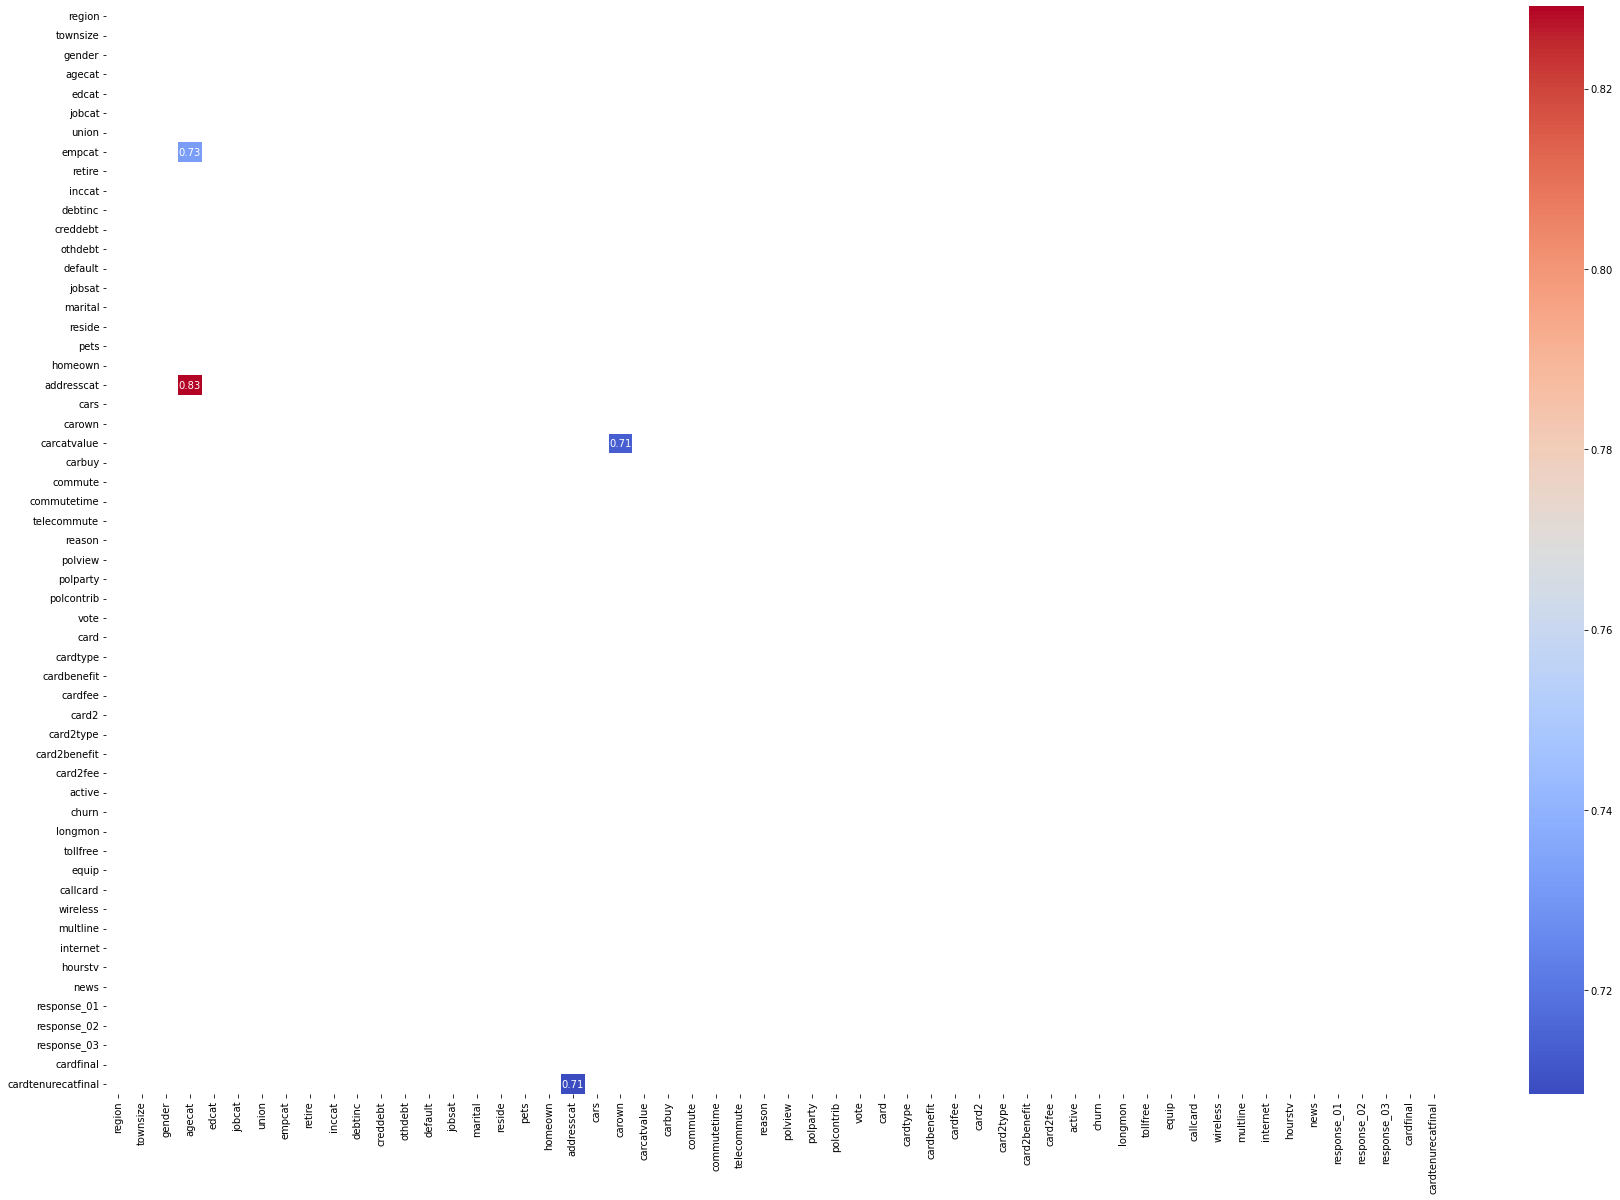

In [227]:
cr=final2.corr()
plt.figure(figsize=(30,20))
cr1=cr[cr>=0.7]
matrix = np.triu(cr1)
sns.heatmap(cr1, annot=True, cmap="coolwarm", mask=matrix)
plt.show()

In [228]:
final2.drop(columns=["hourstv"],inplace=True)

In [229]:
final2.drop(columns=["polview","polparty","vote"],inplace=True)

In [230]:
final2

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,reside,pets,homeown,addresscat,cars,carown,carcatvalue,carbuy,commute,commutetime,telecommute,reason,polcontrib,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,active,churn,longmon,tollfree,equip,callcard,wireless,multline,internet,news,response_01,response_02,response_03,cardfinal,cardtenurecatfinal
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,2.240091,1,1,0,3.0,0.0,0,1,2.0,1,1,0,8,22.0,0,9,0,3,1,1,0,5,3,1,0,0,1,6.50,1,1,1,0,1,0,0,0,1,0,149.46,4
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,1.567980,1,1,0,2.0,6.0,1,1,2.0,1,1,0,1,29.0,1,9,0,2,4,1,0,4,1,3,0,1,0,8.90,0,1,1,1,1,4,1,0,0,0,77.54,4
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,2.536380,0,4,1,3.0,3.0,1,5,3.0,1,1,1,4,24.0,0,2,0,2,1,4,0,4,1,3,0,0,0,28.40,0,0,1,0,1,0,1,0,0,0,359.97,10
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,1.117200,1,2,1,5.0,0.0,1,2,3.0,1,1,1,1,38.0,0,9,0,2,1,4,0,3,2,4,0,1,0,6.00,0,0,1,0,1,2,1,1,0,0,359.41,4
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,0.176341,0,1,1,4.0,0.0,0,2,1.0,0,1,1,6,32.0,0,9,0,4,2,1,0,1,3,2,0,1,0,3.05,1,0,1,1,0,3,0,0,1,0,507.83,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,5,0,5,8.0,7.934080,7.745920,0,1,0,1.0,4.0,1,4,1.0,1,3,0,5,21.0,0,9,1,1,3,3,0,3,3,4,0,0,0,34.10,0,0,1,0,0,0,1,0,0,0,1425.67,10
4996,3,3.0,0,5,2,1,0,3,0,4,15.0,3.336600,9.113400,1,5,0,1.0,1.0,1,3,2.0,1,3,1,4,26.0,0,9,0,3,4,4,0,5,1,2,0,1,0,10.40,1,0,1,1,0,0,0,0,0,0,366.35,8
4997,4,5.0,0,6,4,1,0,5,0,4,10.8,3.557520,8.106480,0,3,0,1.0,0.0,1,5,3.0,1,3,0,1,32.0,0,9,0,1,3,1,0,2,4,4,0,0,0,29.40,1,0,1,0,1,0,1,0,0,0,1527.75,10
4998,1,1.0,0,4,4,2,0,2,0,5,10.8,5.021352,15.390648,1,4,1,4.0,0.0,1,4,2.0,1,3,1,1,12.0,0,9,1,3,1,1,0,4,3,1,0,0,0,7.95,0,1,1,0,1,3,1,0,0,0,752.95,9


In [231]:
pd.DataFrame(final2.dtypes)

,0
region,int64
townsize,float64
gender,int64
agecat,int64
edcat,int64
jobcat,int64
union,int64
empcat,int64
retire,int64
inccat,int64


In [232]:
final2.drop(columns=["telecommute"],inplace=True)

In [233]:
final2

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,reside,pets,homeown,addresscat,cars,carown,carcatvalue,carbuy,commute,commutetime,reason,polcontrib,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,active,churn,longmon,tollfree,equip,callcard,wireless,multline,internet,news,response_01,response_02,response_03,cardfinal,cardtenurecatfinal
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,2.240091,1,1,0,3.0,0.0,0,1,2.0,1,1,0,8,22.0,9,0,3,1,1,0,5,3,1,0,0,1,6.50,1,1,1,0,1,0,0,0,1,0,149.46,4
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,1.567980,1,1,0,2.0,6.0,1,1,2.0,1,1,0,1,29.0,9,0,2,4,1,0,4,1,3,0,1,0,8.90,0,1,1,1,1,4,1,0,0,0,77.54,4
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,2.536380,0,4,1,3.0,3.0,1,5,3.0,1,1,1,4,24.0,2,0,2,1,4,0,4,1,3,0,0,0,28.40,0,0,1,0,1,0,1,0,0,0,359.97,10
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,1.117200,1,2,1,5.0,0.0,1,2,3.0,1,1,1,1,38.0,9,0,2,1,4,0,3,2,4,0,1,0,6.00,0,0,1,0,1,2,1,1,0,0,359.41,4
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,0.176341,0,1,1,4.0,0.0,0,2,1.0,0,1,1,6,32.0,9,0,4,2,1,0,1,3,2,0,1,0,3.05,1,0,1,1,0,3,0,0,1,0,507.83,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,5,0,5,8.0,7.934080,7.745920,0,1,0,1.0,4.0,1,4,1.0,1,3,0,5,21.0,9,1,1,3,3,0,3,3,4,0,0,0,34.10,0,0,1,0,0,0,1,0,0,0,1425.67,10
4996,3,3.0,0,5,2,1,0,3,0,4,15.0,3.336600,9.113400,1,5,0,1.0,1.0,1,3,2.0,1,3,1,4,26.0,9,0,3,4,4,0,5,1,2,0,1,0,10.40,1,0,1,1,0,0,0,0,0,0,366.35,8
4997,4,5.0,0,6,4,1,0,5,0,4,10.8,3.557520,8.106480,0,3,0,1.0,0.0,1,5,3.0,1,3,0,1,32.0,9,0,1,3,1,0,2,4,4,0,0,0,29.40,1,0,1,0,1,0,1,0,0,0,1527.75,10
4998,1,1.0,0,4,4,2,0,2,0,5,10.8,5.021352,15.390648,1,4,1,4.0,0.0,1,4,2.0,1,3,1,1,12.0,9,1,3,1,1,0,4,3,1,0,0,0,7.95,0,1,1,0,1,3,1,0,0,0,752.95,9


In [249]:
#final2.iloc[:,1:53]

In [251]:
#pd.DataFrame(final2.iloc[:,1:53])

In [234]:
pd.DataFrame(final2).columns

Index(['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'empcat', 'retire', 'inccat', 'debtinc', 'creddebt', 'othdebt', 'default', 'jobsat', 'marital', 'reside', 'pets', 'homeown', 'addresscat', 'cars', 'carown', 'carcatvalue', 'carbuy', 'commute', 'commutetime', 'reason', 'polcontrib', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'card2', 'card2type', 'card2benefit', 'card2fee', 'active', 'churn', 'longmon', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'internet', 'news', 'response_01', 'response_02', 'response_03', 'cardfinal', 'cardtenurecatfinal'], dtype='object')

In [235]:
final3=((final2-final2.min())/(final2.max()-final2.min()))

In [236]:
final3

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,reside,pets,homeown,addresscat,cars,carown,carcatvalue,carbuy,commute,commutetime,reason,polcontrib,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,active,churn,longmon,tollfree,equip,callcard,wireless,multline,internet,news,response_01,response_02,response_03,cardfinal,cardtenurecatfinal
0,0.00,0.25,1.0,0.00,0.50,0.0,1.0,0.00,0.0,0.25,0.380137,0.084095,0.093088,1.0,0.00,0.0,0.4,0.000000,0.0,0.00,0.333333,1.0,0.5,0.0,0.777778,0.437363,1.000,0.0,0.50,0.000000,0.000000,0.0,1.00,0.666667,0.000000,0.0,0.0,1.0,0.087090,1.0,1.0,1.0,0.0,1.0,0.00,0.0,0.0,1.0,0.0,0.073626,0.250
1,1.00,1.00,0.0,0.00,0.75,0.2,0.0,0.00,0.0,0.00,0.636986,0.085573,0.065158,1.0,0.00,0.0,0.2,0.461538,1.0,0.00,0.333333,1.0,0.5,0.0,0.000000,0.656045,1.000,0.0,0.25,1.000000,0.000000,0.0,0.75,0.000000,0.666667,0.0,1.0,0.0,0.124415,0.0,1.0,1.0,1.0,1.0,1.00,1.0,0.0,0.0,0.0,0.036165,0.250
2,0.50,0.75,1.0,1.00,0.25,0.2,0.0,1.00,0.0,0.25,0.339041,0.065028,0.105400,0.0,0.75,1.0,0.4,0.230769,1.0,1.00,0.500000,1.0,0.5,1.0,0.333333,0.499844,0.125,0.0,0.25,0.000000,1.000000,0.0,0.75,0.000000,0.666667,0.0,0.0,0.0,0.427676,0.0,0.0,1.0,0.0,1.0,0.00,1.0,0.0,0.0,0.0,0.183277,1.000
3,0.75,0.50,0.0,0.00,0.50,0.2,0.0,0.00,0.0,0.00,0.195205,0.001597,0.046426,1.0,0.25,1.0,0.8,0.000000,1.0,0.25,0.500000,1.0,0.5,1.0,0.000000,0.937207,1.000,0.0,0.25,0.000000,1.000000,0.0,0.50,0.333333,1.000000,0.0,1.0,0.0,0.079314,0.0,0.0,1.0,0.0,1.0,0.50,1.0,1.0,0.0,0.0,0.182985,0.250
4,0.25,0.25,0.0,0.25,0.50,0.2,0.0,0.00,0.0,0.00,0.058219,0.015032,0.007328,0.0,0.00,1.0,0.6,0.000000,0.0,0.25,0.166667,0.5,0.5,1.0,0.555556,0.749766,1.000,0.0,0.75,0.333333,0.000000,0.0,0.00,0.666667,0.333333,0.0,1.0,0.0,0.033436,1.0,0.0,1.0,1.0,0.0,0.75,0.0,0.0,1.0,0.0,0.260294,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.25,0.25,0.0,1.00,0.00,0.0,0.0,1.00,0.0,1.00,0.273973,0.555594,0.321885,0.0,0.00,0.0,0.0,0.307692,1.0,0.75,0.166667,1.0,1.0,0.0,0.444444,0.406123,1.000,1.0,0.00,0.666667,0.666667,0.0,0.50,0.666667,1.000000,0.0,0.0,0.0,0.516322,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.738379,1.000
4996,0.50,0.50,0.0,0.75,0.25,0.0,0.0,0.50,0.0,0.75,0.513699,0.233650,0.378711,1.0,1.00,0.0,0.0,0.076923,1.0,0.50,0.333333,1.0,1.0,1.0,0.333333,0.562324,1.000,0.0,0.50,1.000000,1.000000,0.0,1.00,0.000000,0.333333,0.0,1.0,0.0,0.147743,1.0,0.0,1.0,1.0,0.0,0.00,0.0,0.0,0.0,0.0,0.186600,0.750
4997,0.75,1.00,0.0,1.00,0.75,0.0,0.0,1.00,0.0,0.75,0.369863,0.249120,0.336868,0.0,0.50,0.0,0.0,0.000000,1.0,1.00,0.500000,1.0,1.0,0.0,0.000000,0.749766,1.000,0.0,0.00,0.666667,0.000000,0.0,0.25,1.000000,1.000000,0.0,0.0,0.0,0.443228,1.0,0.0,1.0,0.0,1.0,0.00,1.0,0.0,0.0,0.0,0.791550,1.000
4998,0.00,0.00,0.0,0.50,0.75,0.2,0.0,0.25,0.0,1.00,0.369863,0.351626,0.639565,1.0,0.75,1.0,0.6,0.000000,1.0,0.75,0.333333,1.0,1.0,1.0,0.000000,0.124961,1.000,1.0,0.50,0.000000,0.000000,0.0,0.75,0.666667,0.000000,0.0,0.0,0.0,0.109641,0.0,1.0,1.0,0.0,1.0,0.75,1.0,0.0,0.0,0.0,0.387972,0.875


In [250]:
#from sklearn import preprocessing
#import pandas as pd
#final3 = preprocessing.normalize(final2)
#scaled_df = pd.read_csv
#final2.iloc[:,1:53]

In [349]:
#pd.DataFrame(final3)

In [237]:
final4=pd.get_dummies(final2,columns=["region", "gender","edcat","agecat","jobsat","union","empcat","retire", "inccat", "default", 
"marital","homeown","addresscat","carcatvalue", "carown","carbuy","commute",
"reason","card","cardbenefit","cardfee","active",
"card2","card2","card2type","card2benefit","card2fee","cardtenurecatfinal","tollfree","churn",
"equip","callcard","wireless","multline","internet",
"news","response_01","response_02","response_03"])

In [238]:
final4

,townsize,jobcat,debtinc,creddebt,othdebt,reside,pets,cars,commutetime,polcontrib,cardtype,longmon,cardfinal,region_1,region_2,region_3,region_4,region_5,gender_0,gender_1,edcat_1,edcat_2,edcat_3,edcat_4,edcat_5,agecat_2,agecat_3,agecat_4,agecat_5,agecat_6,jobsat_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,union_0,union_1,empcat_1,empcat_2,empcat_3,empcat_4,empcat_5,retire_0,retire_1,inccat_1,inccat_2,inccat_3,inccat_4,inccat_5,default_0,default_1,marital_0,marital_1,homeown_0,homeown_1,addresscat_1,addresscat_2,addresscat_3,addresscat_4,addresscat_5,carcatvalue_-1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carown_-1,carown_0,carown_1,carbuy_0,carbuy_1,commute_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,reason_1,reason_2,reason_3,reason_4,reason_9,card_1,card_2,card_3,card_4,card_5,cardbenefit_1,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_0,cardfee_1,active_0,active_1,card2_1,card2_2,card2_3,card2_4,card2_5,card2_1,card2_2,card2_3,card2_4,card2_5,card2type_1,card2type_2,card2type_3,card2type_4,card2benefit_1,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_0,card2fee_1,cardtenurecatfinal_2,cardtenurecatfinal_3,cardtenurecatfinal_4,cardtenurecatfinal_5,cardtenurecatfinal_6,cardtenurecatfinal_7,cardtenurecatfinal_8,cardtenurecatfinal_9,cardtenurecatfinal_10,tollfree_0,tollfree_1,churn_0,churn_1,equip_0,equip_1,callcard_0,callcard_1,wireless_0,wireless_1,multline_0,multline_1,internet_0,internet_1,internet_2,internet_3,internet_4,news_0,news_1,response_01_0,response_01_1,response_02_0,response_02_1,response_03_0,response_03_1
0,2.0,1,11.1,1.200909,2.240091,3.0,0.0,2.0,22.0,0,1,6.50,149.46,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0
1,5.0,2,18.6,1.222020,1.567980,2.0,6.0,2.0,29.0,0,4,8.90,77.54,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0
2,4.0,2,9.9,0.928620,2.536380,3.0,3.0,3.0,24.0,0,1,28.40,359.97,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,1,0
3,3.0,2,5.7,0.022800,1.117200,5.0,0.0,3.0,38.0,0,1,6.00,359.41,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0
4,2.0,2,1.7,0.214659,0.176341,4.0,0.0,1.0,32.0,0,2,3.05,507.83,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,1,8.0,7.934080,7.745920,1.0,4.0,1.0,21.0,1,3,34.10,1425.67,0,1,0,0,0,1,0,1,0,0,0,0,0

In [239]:
final5=((final4-final4.min())/(final4.max()-final4.min()))

In [240]:
final5

,townsize,jobcat,debtinc,creddebt,othdebt,reside,pets,cars,commutetime,polcontrib,cardtype,longmon,cardfinal,region_1,region_2,region_3,region_4,region_5,gender_0,gender_1,edcat_1,edcat_2,edcat_3,edcat_4,edcat_5,agecat_2,agecat_3,agecat_4,agecat_5,agecat_6,jobsat_1,jobsat_2,jobsat_3,jobsat_4,jobsat_5,union_0,union_1,empcat_1,empcat_2,empcat_3,empcat_4,empcat_5,retire_0,retire_1,inccat_1,inccat_2,inccat_3,inccat_4,inccat_5,default_0,default_1,marital_0,marital_1,homeown_0,homeown_1,addresscat_1,addresscat_2,addresscat_3,addresscat_4,addresscat_5,carcatvalue_-1,carcatvalue_1,carcatvalue_2,carcatvalue_3,carown_-1,carown_0,carown_1,carbuy_0,carbuy_1,commute_1,commute_2,commute_3,commute_4,commute_5,commute_6,commute_7,commute_8,commute_9,commute_10,reason_1,reason_2,reason_3,reason_4,reason_9,card_1,card_2,card_3,card_4,card_5,cardbenefit_1,cardbenefit_2,cardbenefit_3,cardbenefit_4,cardfee_0,cardfee_1,active_0,active_1,card2_1,card2_2,card2_3,card2_4,card2_5,card2_1,card2_2,card2_3,card2_4,card2_5,card2type_1,card2type_2,card2type_3,card2type_4,card2benefit_1,card2benefit_2,card2benefit_3,card2benefit_4,card2fee_0,card2fee_1,cardtenurecatfinal_2,cardtenurecatfinal_3,cardtenurecatfinal_4,cardtenurecatfinal_5,cardtenurecatfinal_6,cardtenurecatfinal_7,cardtenurecatfinal_8,cardtenurecatfinal_9,cardtenurecatfinal_10,tollfree_0,tollfree_1,churn_0,churn_1,equip_0,equip_1,callcard_0,callcard_1,wireless_0,wireless_1,multline_0,multline_1,internet_0,internet_1,internet_2,internet_3,internet_4,news_0,news_1,response_01_0,response_01_1,response_02_0,response_02_1,response_03_0,response_03_1
0,0.25,0.0,0.380137,0.084095,0.093088,0.4,0.000000,0.333333,0.437363,0.0,0.000000,0.087090,0.073626,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.00,0.2,0.636986,0.085573,0.065158,0.2,0.461538,0.333333,0.656045,0.0,1.000000,0.124415,0.036165,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.75,0.2,0.339041,0.065028,0.105400,0.4,0.230769,0.500000,0.499844,0.0,0.000000,0.427676,0.183277,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.50,0.2,0.195205,0.001597,0.046426,0.8,0.000000,0.500000,0.937207,0.0,0.000000,0.079314,0.182985,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.

In [241]:
from sklearn.datasets import make_classification

Feature: 0, Score: 0.01464
Feature: 1, Score: -0.00700
Feature: 2, Score: -0.01848
Feature: 3, Score: -0.01248
Feature: 4, Score: -0.00521
Feature: 5, Score: -0.01357
Feature: 6, Score: 0.00169
Feature: 7, Score: 0.01246
Feature: 8, Score: -0.01766
Feature: 9, Score: 0.15986
Feature: 10, Score: -0.03837
Feature: 11, Score: 0.06127
Feature: 12, Score: 0.06138
Feature: 13, Score: 0.00218
Feature: 14, Score: -0.01024
Feature: 15, Score: -0.00015
Feature: 16, Score: 0.00230
Feature: 17, Score: -0.00123
Feature: 18, Score: 0.00452
Feature: 19, Score: -0.00283
Feature: 20, Score: -0.00486
Feature: 21, Score: -0.00308
Feature: 22, Score: 0.00252
Feature: 23, Score: 0.00449
Feature: 24, Score: -0.00183
Feature: 25, Score: 0.00925
Feature: 26, Score: -0.00485
Feature: 27, Score: 0.00403
Feature: 28, Score: -0.17696
Feature: 29, Score: -0.00818
Feature: 30, Score: -0.00397
Feature: 31, Score: -0.00030
Feature: 32, Score: -0.08933
Feature: 33, Score: 0.00093
Feature: 34, Score: -0.00390
Feature: 

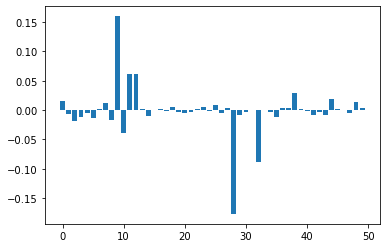

In [242]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
y=final3["cardfinal"]
x=final3.drop(columns=["cardfinal"])
#x, y = make_regression(n_samples=5000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 7.02776
Feature: 1, Score: -3.35794
Feature: 2, Score: -35.47591
Feature: 3, Score: -5.98773
Feature: 4, Score: -2.50044
Feature: 5, Score: -5.20852
Feature: 6, Score: 3.23980
Feature: 7, Score: 5.98248
Feature: 8, Score: -33.90740
Feature: 9, Score: 76.72611
Feature: 10, Score: -2.52283
Feature: 11, Score: 8.23656
Feature: 12, Score: 4.89693
Feature: 13, Score: 4.18948
Feature: 14, Score: -4.91674
Feature: 15, Score: -0.28456
Feature: 16, Score: 0.88293
Feature: 17, Score: -0.18224
Feature: 18, Score: 8.67872
Feature: 19, Score: -1.35907
Feature: 20, Score: -1.55503
Feature: 21, Score: -2.95539
Feature: 22, Score: 1.21184
Feature: 23, Score: 8.62181
Feature: 24, Score: -0.39032
Feature: 25, Score: 0.55455
Feature: 26, Score: -1.16339
Feature: 27, Score: 7.73104
Feature: 28, Score: -84.93512
Feature: 29, Score: -5.23665
Feature: 30, Score: -2.54208
Feature: 31, Score: -0.56813
Feature: 32, Score: -42.87339
Feature: 33, Score: 0.59210
Feature: 34, Score: -2.49819
Feat

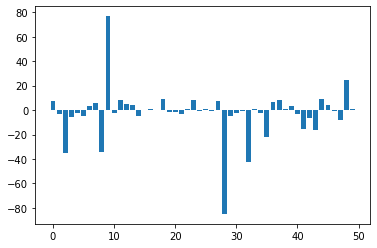

In [243]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
y=final2["cardfinal"]
x=final2.drop(columns=["cardfinal"])
#x, y = make_regression(n_samples=5000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(x, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [244]:
y=final2["cardfinal"]
x=final2.drop(columns=["cardfinal"])

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [246]:
lr=LinearRegression()

In [247]:
lr

LinearRegression()

In [248]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3,random_state=0)

In [249]:
lr.fit(x_train, y_train)

LinearRegression()

In [250]:
y_pred=lr.predict(x_test)

In [251]:
y_pred

array([755.19233221, 308.52149862, 605.11634522, ..., 331.75538928,
       634.23685083, 417.4960434 ])

In [252]:
lr.score(x_train,y_train)

0.2527717066002516

In [253]:
lr.score(x_test,y_test)

0.248036156729583

In [254]:
lr.coef_

array([  6.21350517,  -4.56417545, -31.07874798,  -7.73229953,
        -0.40531031,  -6.40222075,  -2.64689744,  12.71090857,
       -35.7578724 ,  73.07111642,  -2.25525177,   4.65626171,
         6.7446262 ,   2.92398089,  -5.69470247,  -0.35437225,
        -2.59424825,  -0.87228164,   6.10537336,  -2.40939569,
        -4.37446893,  -3.01148353,  -0.5601902 ,   6.0862821 ,
         0.42565895,   0.56384379,  -2.05859325,   1.85027608,
       -83.97226978,  -2.77533704,  -2.38714461,  -1.81185678,
       -42.61781892,  -1.98102894,  -2.43166574, -28.82859286,
        11.50612911,   5.24520173,   0.67997217,   3.72732159,
        -6.5430052 , -25.77021942,  -2.55521955, -18.70283483,
        10.5836046 ,   5.22362383,   2.65450327, -17.24839356,
        25.89349978,   2.96244855])

In [255]:
lr.intercept_

724.2262529963633

In [259]:
#logistic regression for feature importance
#from sklearn.datasets import make_classification
#from sklearn.linear_model import LogisticRegression


# define dataset
#y=final3["cardfinal"]
#x=final3.drop(columns=["cardfinal"])
#x, y = make_classification(n_samples=5000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
#model=LogisticRegression()
# fit the model
#model.fit(x, y)
# get importance
#importance = model.coef_[0]
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

Feature: 0, Score: 0.01652
Feature: 1, Score: 0.01182
Feature: 2, Score: 0.04945
Feature: 3, Score: 0.05330
Feature: 4, Score: 0.03831
Feature: 5, Score: 0.00873
Feature: 6, Score: 0.02424
Feature: 7, Score: 0.01674
Feature: 8, Score: 0.03441
Feature: 9, Score: 0.00299
Feature: 10, Score: 0.01308
Feature: 11, Score: 0.04349
Feature: 12, Score: 0.00885
Feature: 13, Score: 0.00272
Feature: 14, Score: 0.00081
Feature: 15, Score: 0.00493
Feature: 16, Score: 0.00845
Feature: 17, Score: 0.00224
Feature: 18, Score: 0.00641
Feature: 19, Score: 0.00180
Feature: 20, Score: 0.00710
Feature: 21, Score: 0.00453
Feature: 22, Score: 0.00339
Feature: 23, Score: 0.00030
Feature: 24, Score: 0.00098
Feature: 25, Score: 0.00387
Feature: 26, Score: 0.00147
Feature: 27, Score: 0.00523
Feature: 28, Score: 0.00291
Feature: 29, Score: 0.00117
Feature: 30, Score: 0.00345
Feature: 31, Score: 0.00256
Feature: 32, Score: 0.00767
Feature: 33, Score: 0.00519
Feature: 34, Score: 0.00121
Feature: 35, Score: 0.00324
Fe

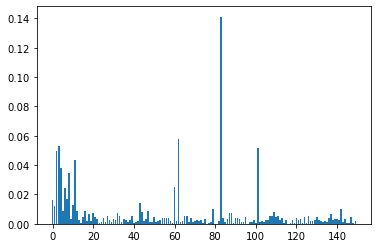

In [256]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression

from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import DecisionTreeClassifier
# define dataset
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3,random_state=100)
dt=DecisionTreeRegressor
dt1=DecisionTreeRegressor(random_state=100)
dt1.fit(x, y)
pd.DataFrame({"Features": x.columns, "Imp": dt1.feature_importances_}).sort_values(by=["Imp"], ascending=False)

#x, y = make_regression(n_samples=5000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [300]:
#print("Train Accuracy", dt1.score(x_train, y_train))
#print("Test Accuracy", dt1.score(x_test, y_test))

Feature: 0, Score: 0.01936
Feature: 1, Score: 0.01723
Feature: 2, Score: 0.00796
Feature: 3, Score: 0.00947
Feature: 4, Score: 0.01271
Feature: 5, Score: 0.01264
Feature: 6, Score: 0.00723
Feature: 7, Score: 0.01338
Feature: 8, Score: 0.00660
Feature: 9, Score: 0.12318
Feature: 10, Score: 0.03498
Feature: 11, Score: 0.05554
Feature: 12, Score: 0.04762
Feature: 13, Score: 0.00457
Feature: 14, Score: 0.02192
Feature: 15, Score: 0.00236
Feature: 16, Score: 0.01617
Feature: 17, Score: 0.02528
Feature: 18, Score: 0.00508
Feature: 19, Score: 0.01322
Feature: 20, Score: 0.01689
Feature: 21, Score: 0.00295
Feature: 22, Score: 0.01523
Feature: 23, Score: 0.00591
Feature: 24, Score: 0.02049
Feature: 25, Score: 0.04617
Feature: 26, Score: 0.01512
Feature: 27, Score: 0.00655
Feature: 28, Score: 0.15117
Feature: 29, Score: 0.01401
Feature: 30, Score: 0.01519
Feature: 31, Score: 0.00557
Feature: 32, Score: 0.06013
Feature: 33, Score: 0.01250
Feature: 34, Score: 0.01480
Feature: 35, Score: 0.00651
Fe

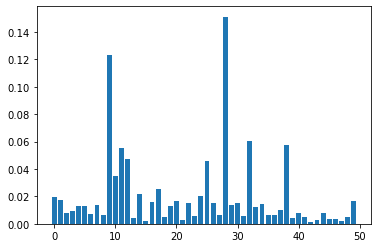

In [257]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import DecisionTreeClassifier
# define dataset
y=final3["cardfinal"]
x=final3.drop(columns=["cardfinal"])
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3,random_state=100)
dt=DecisionTreeRegressor
dt1=DecisionTreeRegressor(random_state=100)
dt1.fit(x, y)
pd.DataFrame({"Features": x.columns, "Imp": dt1.feature_importances_}).sort_values(by=["Imp"], ascending=False)

#x, y = make_regression(n_samples=5000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

R-squared: 1.0
MSE:  0.039558413745117746
RMSE:  0.19889297057743832


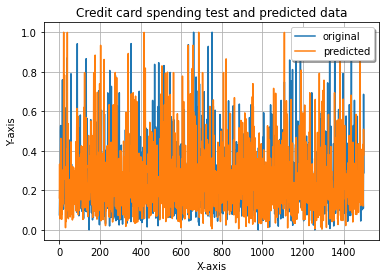

In [258]:
y=final5["cardfinal"]
x=final5.drop(columns=["cardfinal"])
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=.3, random_state=100)
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
score = dtr.score(xtrain, ytrain)
print("R-squared:", score)
ypred = dtr.predict(xtest)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0))
x_ax = range(len(ytest))

plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Credit card spending test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()   

In [259]:
xtrain.shape

(3500, 150)

In [260]:
xtest.shape

(1500, 150)

In [261]:
final4.shape

(5000, 151)

In [262]:
final5.shape

(5000, 151)

In [263]:
final2.shape

(5000, 51)

In [264]:
y=final5["cardfinal"]
x=final5.drop(columns=["cardfinal"])

In [265]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=1000)

In [266]:
from sklearn.tree import DecisionTreeRegressor

In [267]:
dt1=DecisionTreeRegressor()

In [268]:
dt1.fit(x_train, y_train)

DecisionTreeRegressor()

In [269]:
ypred=dt1.predict(x_train)

In [270]:
ypred

array([0.17665133, 0.88201697, 0.61503979, ..., 0.29783413, 0.16744738,
       0.0681103 ])

In [271]:
print("Train Accuracy", dt1.score(x_train, y_train))
print("Test Accuracy", dt1.score(x_test, y_test))

Train Accuracy 1.0
Test Accuracy -0.40164862970754656


In [272]:
#Import the class
from sklearn.tree import DecisionTreeRegressor

y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])

#Create an object (model)
dt=DecisionTreeRegressor()
dt1 = DecisionTreeRegressor(max_depth=2,
                             random_state=1)

#Fit (train) the model
dt1.fit(x, y)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [273]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,
                                                    random_state=0,
                                                    shuffle=True)

In [274]:
#from sklearn.model_selection import cross_val_score as cv
from sklearn.tree import DecisionTreeRegressor
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x = final4.iloc[:, :50].values
y = final4.iloc[:, :50].values
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3)

In [275]:
dt=DecisionTreeRegressor
dt1=DecisionTreeRegressor(random_state=1000)
dt1.fit(x_train,y_train)
ypred=dt1.predict(x_train)

In [276]:
#cv(dt1,x,y, cv=10)
#dt2=DecisionTreeRegressor(max_depth=7)
dt1.fit(x_train, y_train)
print("Train Accuracy", dt1.score(x_train, y_train))
print("Test Accuracy", dt1.score(x_test, y_test))

Train Accuracy 1.0
Test Accuracy -0.6826362978962055


In [365]:
#y=final4["cardfinal"]
#x=final4.drop(columns=["cardfinal"])
#x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3)
#dt=DecisionTreeRegressor
#dt1=DecisionTreeRegressor(random_state=0)
#dt1.fit(x_train,y_train)
#dt2=DecisionTreeRegressor(max_depth=7)
#dt2.fit(x_train, y_train)
#print("Train Accuracy", dt2.score(x_train, y_train))
#print("Test Accuracy", dt2.score(x_test, y_test))

In [278]:
dt2=DecisionTreeRegressor(max_depth=3)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.03120465612594603
Test Accuracy 0.025563020167636355


In [279]:
dt2=DecisionTreeRegressor(max_depth=1)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.01958529318162132
Test Accuracy 0.01595252715459521


In [280]:
dt2=DecisionTreeRegressor(max_depth=2)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.027858415297612335
Test Accuracy 0.024446273072729813


Feature: 0, Score: 0.01692
Feature: 1, Score: 0.01140
Feature: 2, Score: 0.04653
Feature: 3, Score: 0.05397
Feature: 4, Score: 0.03971
Feature: 5, Score: 0.01025
Feature: 6, Score: 0.02358
Feature: 7, Score: 0.01546
Feature: 8, Score: 0.03401
Feature: 9, Score: 0.00320
Feature: 10, Score: 0.01260
Feature: 11, Score: 0.04584
Feature: 12, Score: 0.00953
Feature: 13, Score: 0.00290
Feature: 14, Score: 0.00124
Feature: 15, Score: 0.00438
Feature: 16, Score: 0.00823
Feature: 17, Score: 0.00517
Feature: 18, Score: 0.00487
Feature: 19, Score: 0.00187
Feature: 20, Score: 0.00741
Feature: 21, Score: 0.00433
Feature: 22, Score: 0.00330
Feature: 23, Score: 0.00016
Feature: 24, Score: 0.00062
Feature: 25, Score: 0.00293
Feature: 26, Score: 0.00219
Feature: 27, Score: 0.00419
Feature: 28, Score: 0.00312
Feature: 29, Score: 0.00141
Feature: 30, Score: 0.00279
Feature: 31, Score: 0.00249
Feature: 32, Score: 0.00837
Feature: 33, Score: 0.00542
Feature: 34, Score: 0.00100
Feature: 35, Score: 0.00296
Fe

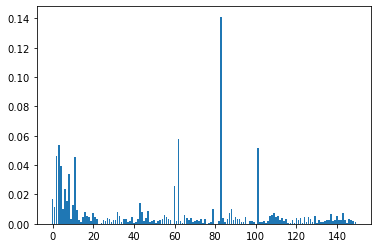

In [281]:
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=.3,random_state=100)
dt=DecisionTreeRegressor
dt1=DecisionTreeRegressor(random_state=100)
dt1.fit(x, y)
pd.DataFrame({"Features": x.columns, "Imp": dt1.feature_importances_}).sort_values(by=["Imp"], ascending=False)
model = DecisionTreeRegressor()
model.fit(x,y)
importance = model.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [282]:
dt2=DecisionTreeRegressor(max_depth=3)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.29595757020502766
Test Accuracy 0.22879653717128223


In [283]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
standardized_x = scaler.transform(x_train)
standardized_x_test = scaler.transform(x_test)

In [284]:
dt2=DecisionTreeRegressor(max_depth=2)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.24000918837454277
Test Accuracy 0.19036719622779608


In [285]:
dt2=DecisionTreeRegressor(max_depth=5)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.37420037195484324
Test Accuracy 0.2496124657359411


In [286]:
dt2=DecisionTreeRegressor(max_depth=4)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.33153219008250223
Test Accuracy 0.24912619427988614


In [288]:
dt2=DecisionTreeRegressor(max_depth=6)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.4262478927333796
Test Accuracy 0.19300732711047242


In [289]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x_train)
normalized_x = scaler.transform(x_train)
normalized_x_test = scaler.transform(x_test)

In [291]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn import metrics as mt

In [292]:
#y=final4["cardfinal"]
#x=final4.drop(columns=["cardfinal"])

In [293]:
#x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=750)

In [294]:
#dt2=DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=20, max_depth=15, max_features="auto",)

In [295]:
#from sklearn.tree import DecisionTreeRegressor

In [296]:
#dt2=DecisionTreeRegressor()

In [300]:
#dt2.fit(x_train, y_train)

In [301]:
#print("Train Accuracy", dt2.score(x_train, y_train))
#print("Test Accuracy", dt2.score(x_test, y_test))

In [302]:
#dt1=DecisionTreeRegressor(min_samples_leaf=10, min_samples_split=20, max_depth=15, max_features="auto")
#x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=750)
#dt2.fit(x_train, y_train)
#print("Train Accuracy", dt2.score(x_train, y_train))
#print("Test Accuracy", dt2.score(x_test, y_test))

In [303]:
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])

In [304]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=1000)

In [305]:
from sklearn.tree import DecisionTreeRegressor

In [306]:
dt1=DecisionTreeRegressor()

In [307]:
dt1.fit(x_train, y_train)

DecisionTreeRegressor()

In [416]:
#print("Train Accuracy", dt1.score(x_train, y_train))
#print("Test Accuracy", dt1.score(x_test, y_test))

In [308]:
dt2=DecisionTreeRegressor(max_depth=3)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.2760620224953443
Test Accuracy 0.2814503563445271


In [309]:
dt2=DecisionTreeRegressor(max_depth=2)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.22418407906325277
Test Accuracy 0.22575770016506813


In [310]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=1250)

In [311]:
dt2=DecisionTreeRegressor(max_depth=3)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.28570665853488075
Test Accuracy 0.2616717650755115


In [312]:
dt2=DecisionTreeRegressor(min_samples_split=150)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.37675748368293493
Test Accuracy 0.25200307906790487


In [313]:
dt2=DecisionTreeRegressor(min_samples_leaf=100)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.3261334986660126
Test Accuracy 0.2714911984778474


In [314]:
dt2=DecisionTreeRegressor(min_samples_split=500)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.3087602452282696
Test Accuracy 0.2792076866048133


In [315]:
dt2=DecisionTreeRegressor(min_samples_leaf=150)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.305909439659498
Test Accuracy 0.2742510144302849


In [316]:
dt2=DecisionTreeRegressor(min_samples_leaf=175)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.29606529955544836
Test Accuracy 0.2707229442986758


In [317]:
dt2=DecisionTreeRegressor(min_samples_leaf=200)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.29431755192233355
Test Accuracy 0.2753457349974523


In [318]:
dt2=DecisionTreeRegressor(min_samples_leaf=250)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.2814111638960861
Test Accuracy 0.27749144091586886


In [319]:
dt2=DecisionTreeRegressor(min_samples_split=350)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.31696445473346835
Test Accuracy 0.2817845695952482


In [320]:
final2

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,reside,pets,homeown,addresscat,cars,carown,carcatvalue,carbuy,commute,commutetime,reason,polcontrib,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,active,churn,longmon,tollfree,equip,callcard,wireless,multline,internet,news,response_01,response_02,response_03,cardfinal,cardtenurecatfinal
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,2.240091,1,1,0,3.0,0.0,0,1,2.0,1,1,0,8,22.0,9,0,3,1,1,0,5,3,1,0,0,1,6.50,1,1,1,0,1,0,0,0,1,0,149.46,4
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,1.567980,1,1,0,2.0,6.0,1,1,2.0,1,1,0,1,29.0,9,0,2,4,1,0,4,1,3,0,1,0,8.90,0,1,1,1,1,4,1,0,0,0,77.54,4
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,2.536380,0,4,1,3.0,3.0,1,5,3.0,1,1,1,4,24.0,2,0,2,1,4,0,4,1,3,0,0,0,28.40,0,0,1,0,1,0,1,0,0,0,359.97,10
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,1.117200,1,2,1,5.0,0.0,1,2,3.0,1,1,1,1,38.0,9,0,2,1,4,0,3,2,4,0,1,0,6.00,0,0,1,0,1,2,1,1,0,0,359.41,4
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,0.176341,0,1,1,4.0,0.0,0,2,1.0,0,1,1,6,32.0,9,0,4,2,1,0,1,3,2,0,1,0,3.05,1,0,1,1,0,3,0,0,1,0,507.83,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,5,0,5,8.0,7.934080,7.745920,0,1,0,1.0,4.0,1,4,1.0,1,3,0,5,21.0,9,1,1,3,3,0,3,3,4,0,0,0,34.10,0,0,1,0,0,0,1,0,0,0,1425.67,10
4996,3,3.0,0,5,2,1,0,3,0,4,15.0,3.336600,9.113400,1,5,0,1.0,1.0,1,3,2.0,1,3,1,4,26.0,9,0,3,4,4,0,5,1,2,0,1,0,10.40,1,0,1,1,0,0,0,0,0,0,366.35,8
4997,4,5.0,0,6,4,1,0,5,0,4,10.8,3.557520,8.106480,0,3,0,1.0,0.0,1,5,3.0,1,3,0,1,32.0,9,0,1,3,1,0,2,4,4,0,0,0,29.40,1,0,1,0,1,0,1,0,0,0,1527.75,10
4998,1,1.0,0,4,4,2,0,2,0,5,10.8,5.021352,15.390648,1,4,1,4.0,0.0,1,4,2.0,1,3,1,1,12.0,9,1,3,1,1,0,4,3,1,0,0,0,7.95,0,1,1,0,1,3,1,0,0,0,752.95,9


In [798]:
#from sklearn.preprocessing import LabelEncoder
#enc = LabelEncoder()
#y = enc.fit_transform(y)

In [321]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=1000)
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [322]:
grid_search_cv.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=8, random_state=42)

In [323]:
gsv=grid_search_cv

In [324]:
gsv.best_score_

0.2544481896161413

In [325]:
gsv.best_params_

{'max_leaf_nodes': 8, 'min_samples_split': 2}

In [316]:
#dt3.fit(x_train, y_train)

In [326]:
from sklearn.model_selection import cross_val_score as cv

In [327]:
cv(dt2,x,y, cv=10)

array([0.3363816 , 0.22173862, 0.22504125, 0.35166695, 0.27527795,
       0.31854871, 0.24876887, 0.2842292 , 0.33030724, 0.29513181])

In [333]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dt = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10),
                                 "min_samples_leaf": range(100, 150,250)},
                  cv=KFold(n_splits=10, random_state=1, shuffle=True),
                  scoring='neg_mean_squared_error')

gs.fit(x_train, y_train)

print(gs.best_params_)
print(gs.best_score_)

{'max_depth': 6, 'min_samples_leaf': 100, 'min_samples_split': 10}
-73720.24758168947


In [334]:
dt3=DecisionTreeRegressor(max_depth=3,min_samples_leaf=100, min_samples_split=10)

In [335]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=1000)
dt3.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.30255083725973353
Test Accuracy 0.3128288638108401


In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

#def gini(p):
#   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

#def entropy(p):
#   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

#def classification_error(p):
#   return 1 - np.max([p, 1 - p])

#x = np.arange(0.0, 1.0, 0.01)
#ent = [entropy(p) if p != 0 else None for p in x]
#scaled_ent = [e*0.5 if e else None for e in ent]
#c_err = [classification_error(i) for i in x]

#fig = plt.figure()
#ax = plt.subplot(111)

#for j, lab, ls, c, in zip(
#      [ent, scaled_ent, gini(x), c_err],
#      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
#      ['-', '-', '--', '-.'],
#      ['lightgray', 'red', 'green', 'blue']):
#   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

#ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
#         ncol=1, fancybox=True, shadow=False)

#ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
#ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

#plt.ylim([0, 1.1])
#plt.xlabel('p(j=1)')
#plt.ylabel('Impurity Index')
#plt.show()

In [372]:
#from sklearn.tree import plot_tree

#fn=x_train.columns

#classes=["yes","no"]

# Setting dpi = 300 to make image clearer than default
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=1000)

#plot_tree(dt3,
#           feature_names = fn, 
#           class_names=classes,
#           filled = True);

In [255]:


#dt1=DecisionTreeClassifier(max_depth=7)
#dt1.fit(x_train, y_train)
#print("Train Accuracy", dt2.score(x_train, y_train))
#print("Test Accuracy", dt2.score(x_test, y_test))

In [336]:
final4.dtypes

townsize                 float64
jobcat                     int64
debtinc                  float64
creddebt                 float64
othdebt                  float64
reside                   float64
pets                     float64
cars                     float64
commutetime              float64
polcontrib                 int64
cardtype                   int64
longmon                  float64
cardfinal                float64
region_1                   uint8
region_2                   uint8
region_3                   uint8
region_4                   uint8
region_5                   uint8
gender_0                   uint8
gender_1                   uint8
edcat_1                    uint8
edcat_2                    uint8
edcat_3                    uint8
edcat_4                    uint8
edcat_5                    uint8
agecat_2                   uint8
agecat_3                   uint8
agecat_4                   uint8
agecat_5                   uint8
agecat_6                   uint8
jobsat_1  

In [259]:
#y=final2["cardfinal"]
#x=final2.drop(columns=["cardfinal"])

#importance = model.feature_importances_
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' % (i,v))
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [263]:
#y=final2["cardfinal"]
#x=final2.drop(columns=["cardfinal"])

Feature: 0, Score: 0.01237
Feature: 1, Score: 0.01376
Feature: 2, Score: 0.04763
Feature: 3, Score: 0.05687
Feature: 4, Score: 0.05581
Feature: 5, Score: 0.01221
Feature: 6, Score: 0.02319
Feature: 7, Score: 0.01305
Feature: 8, Score: 0.02956
Feature: 9, Score: 0.00460
Feature: 10, Score: 0.01244
Feature: 11, Score: 0.04861
Feature: 12, Score: 0.00332
Feature: 13, Score: 0.00339
Feature: 14, Score: 0.00375
Feature: 15, Score: 0.00365
Feature: 16, Score: 0.00423
Feature: 17, Score: 0.00320
Feature: 18, Score: 0.00367
Feature: 19, Score: 0.00346
Feature: 20, Score: 0.00437
Feature: 21, Score: 0.00414
Feature: 22, Score: 0.00394
Feature: 23, Score: 0.00228
Feature: 24, Score: 0.00149
Feature: 25, Score: 0.00245
Feature: 26, Score: 0.00338
Feature: 27, Score: 0.00507
Feature: 28, Score: 0.00325
Feature: 29, Score: 0.00315
Feature: 30, Score: 0.00343
Feature: 31, Score: 0.00312
Feature: 32, Score: 0.00485
Feature: 33, Score: 0.00314
Feature: 34, Score: 0.00277
Feature: 35, Score: 0.00259
Fe

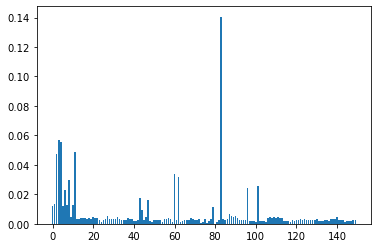

In [337]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# define dataset
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=1000)
#x, y = make_regression(n_samples=5000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01160
Feature: 1, Score: 0.01357
Feature: 2, Score: 0.04566
Feature: 3, Score: 0.05809
Feature: 4, Score: 0.05375
Feature: 5, Score: 0.01231
Feature: 6, Score: 0.02382
Feature: 7, Score: 0.01377
Feature: 8, Score: 0.02860
Feature: 9, Score: 0.00400
Feature: 10, Score: 0.01227
Feature: 11, Score: 0.04892
Feature: 12, Score: 0.00361
Feature: 13, Score: 0.00383
Feature: 14, Score: 0.00378
Feature: 15, Score: 0.00345
Feature: 16, Score: 0.00463
Feature: 17, Score: 0.00394
Feature: 18, Score: 0.00346
Feature: 19, Score: 0.00358
Feature: 20, Score: 0.00428
Feature: 21, Score: 0.00411
Feature: 22, Score: 0.00374
Feature: 23, Score: 0.00221
Feature: 24, Score: 0.00138
Feature: 25, Score: 0.00254
Feature: 26, Score: 0.00394
Feature: 27, Score: 0.00491
Feature: 28, Score: 0.00307
Feature: 29, Score: 0.00367
Feature: 30, Score: 0.00374
Feature: 31, Score: 0.00282
Feature: 32, Score: 0.00477
Feature: 33, Score: 0.00393
Feature: 34, Score: 0.00268
Feature: 35, Score: 0.00298
Fe

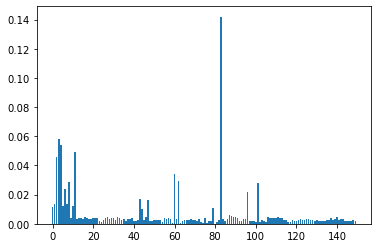

In [423]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# define dataset
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
#x, y = make_regression(n_samples=5000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [338]:
x, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=100)

In [339]:
print(x.shape, y.shape)

(1000, 20) (1000,)


In [340]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
#define dataset
x, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=2)
# define the model
model = RandomForestRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -90.351 (7.610)


In [341]:
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [342]:
ypred = rf.predict(x_train)

In [343]:
ypred

array([ 302.2728  ,  685.3736  ,  462.95097 , ...,  900.39867 ,
        613.5635  , 1133.669736])

In [344]:
rf=RandomForestRegressor(min_samples_leaf=10, min_samples_split=20, max_depth=15, max_features="auto",max_samples=0.7,)

In [345]:
rf.fit(x,y)
print("score on Train {} ".format(rf.score(x_train, y_train)))
print("score on Test {} ".format(rf.score(x_test, y_test)))

score on Train 0.5287912224791143 
score on Test 0.5120085882767924 


In [346]:
rf=RandomForestRegressor(min_samples_leaf=25, min_samples_split=50, max_depth=15, max_features="auto",max_samples=0.7,)
rf.fit(x,y)
print("score on Train {} ".format(rf.score(x_train, y_train)))
print("score on Test {} ".format(rf.score(x_test, y_test)))

score on Train 0.41205682878644856 
score on Test 0.39313615571749916 


In [347]:
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=1000)
dt2=RandomForestRegressor(max_depth=2)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.2455607664857491
Test Accuracy 0.25127764548606857


In [348]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=1000)
dt2=RandomForestRegressor(max_depth=5)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.4031048249768019
Test Accuracy 0.32056957852245827


In [349]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=100)
dt2=RandomForestRegressor(max_depth=1)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.15135673267742666
Test Accuracy 0.11524824983805193


In [350]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=500)
dt2=RandomForestRegressor(max_depth=3)
dt2.fit(x_train, y_train)
print("Train Accuracy", dt2.score(x_train, y_train))
print("Test Accuracy", dt2.score(x_test, y_test))

Train Accuracy 0.3129689130744544
Test Accuracy 0.27857215520959533


In [351]:
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression

In [352]:
dt=DecisionTreeRegressor(max_depth=3)
bag=BaggingRegressor(base_estimator=dt, n_estimators=300, random_state=100)

In [353]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=500)

In [354]:
bag.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                 n_estimators=300, random_state=100)

In [355]:
print("TrainScore", bag.score(x_train, y_train))

TrainScore 0.314993559218515


In [356]:
print("TestScore", bag.score(x_test, y_test))

TestScore 0.2769077622849935


In [357]:
# test regression dataset
from sklearn.datasets import make_regression
# define dataset
x, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
# summarize the dataset
print(x.shape, y.shape)

(1000, 20) (1000,)


In [358]:
# evaluate bagging ensemble for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
# define the model
model = BaggingRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -101.209 (9.900)


In [299]:
#mt.plot_roc_curve(rf,xtrain,ytrain)
#plt.show()

In [293]:
#print(mt.classification_report(ytrain,ypred))

In [453]:
#cv_rf = cross_val_score(rf,X,y,cv = 10,scoring = 'f1_weighted')
#rf_bias = np.mean(1-cv_rf)
#rf_var = np.std(cv_rf,ddof = 1)
#rf_bias,rf_var

In [359]:
from sklearn.ensemble import AdaBoostRegressor

In [360]:
ad=AdaBoostRegressor()

In [361]:
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=1000)

In [362]:
ad.fit(x_train,y_train)
print("score on Train {} ".format(ad.score(x_train, y_train)))
print("score on Test {} ".format(ad.score(x_test, y_test)))

score on Train 0.04727447330271284 
score on Test 0.06403098900185422 


In [363]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=500)
ad.fit(x_train,y_train)
print("score on Train {} ".format(ad.score(x_train, y_train)))
print("score on Test {} ".format(ad.score(x_test, y_test)))

score on Train 0.11944101518067318 
score on Test 0.1056161713316448 


In [364]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=250)
ad.fit(x_train,y_train)
print("score on Train {} ".format(ad.score(x_train, y_train)))
print("score on Test {} ".format(ad.score(x_test, y_test)))

score on Train 0.18253333113787273 
score on Test 0.1411936747795377 


In [365]:
x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=100)
ad.fit(x_train,y_train)
print("score on Train {} ".format(ad.score(x_train, y_train)))
print("score on Test {} ".format(ad.score(x_test, y_test)))

score on Train 0.05485947126592483 
score on Test -0.032041355723072096 


In [366]:
# test classification dataset
#from sklearn.datasets import make_classification
# define dataset
#x, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# summarize the dataset
#print(x.shape, y.shape)

In [866]:

# evaluate adaboost algorithm for classification
#from numpy import mean
#from numpy import std
#from sklearn.datasets import make_classification
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.ensemble import AdaBoostClassifier
# define dataset
#y=final4["cardfinal"]
#x=final4.drop(columns=["cardfinal"])
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1000)
#x.shape(1,1000)
#y.shape(1,1000)
#x, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=6)
# define the model
#model = AdaBoostRegressor()
#model.fit(x,y)
# evaluate the model
#cv = RepeatedStratifiedKFold(n_splits=100, n_repeats=3, random_state=1)
#n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [367]:
ad=AdaBoostRegressor()
adnew=AdaBoostRegressor(n_estimators=100, base_estimator=RandomForestRegressor(max_depth=12),learning_rate=0.001)
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
adnew.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=12),
                  learning_rate=0.001, n_estimators=100)

In [368]:
print("score on Train {} ".format(adnew.score(x_train, y_train)))
print("score on Test {} ".format(adnew.score(x_test, y_test)))

score on Train 0.7958204709367234 
score on Test 0.28313819780597416 


In [397]:
ad=AdaBoostRegressor()
adnew=AdaBoostRegressor(n_estimators=100, base_estimator=RandomForestRegressor(max_depth=5),learning_rate=0.001)
y=final4["cardfinal"]
x=final4.drop(columns=["cardfinal"])
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
adnew.fit(x_train,y_train)
print("score on Train {} ".format(adnew.score(x_train, y_train)))
print("score on Test {} ".format(adnew.score(x_test, y_test)))

score on Train 0.40788143053944304 
score on Test 0.28066807610618105 


In [470]:
# xgboost for feature importance on a classification problem
#from sklearn.datasets import make_classification
#from xgboost import XGBRegressor

# define dataset
#y=final4["cardfinal"]
#x=final4.drop(columns=["cardfinal"])
#xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)
#x, y = make_classification(n_samples=5000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
#model = XGBRegressor()
# fit the model
#model.fit(x, y)
# get importance
#importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

In [369]:
from xgboost import XGBRegressor

In [370]:
xgb=XGBRegressor()

In [379]:
#y1=final4["cardfinal"]
#x1=final4.drop(columns=["cardfinal"])
#x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=100)

In [373]:
#duplicate_columns = final4.columns[final4.columns.duplicated()]

In [438]:
#duplicate_columns

In [375]:
#test_df = final4.loc[:,~final4.columns.duplicated()]

In [380]:
#test_df

In [378]:
#y1=test_df["cardfinal"]
#x1=test_df.drop(columns=["cardfinal"])
#x_train , x_test, y_train , y_test=train_test_split(x,y,test_size=.3, random_state=100)

#xgb.fit(x_train,y_train)
#print("score on Train {} ".format(xgb.score(x_train, y_train)))
#print("score on Test {} ".format(xgb.score(x_test, y_test)))

In [477]:
# plot learning curve
#from numpy import loadtxt
#from xgboost import XGBRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
#from matplotlib import pyplot
# load data
# split data into X and y
#y=final4["cardfinal"]
#x=final4.drop(columns=["cardfinal"])
# split data into train and test sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
#data = pd.DataFrame(np.arange(12).reshape((4,3)), columns=['a', 'b', 'c'])
#label = pd.DataFrame(np.random.randint(2, size=4))
#dtrain = xgb.DMatrix(data, label=label,feature_names=['diff','name','feature'])
# fit model no training data
#model = XGBRegressor()
#eval_set = [(x_train, y_train), (x_test, y_test)]
#model.fit(x_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
# make predictions for test data
#y_pred = model.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
#accuracy = accuracy_score(y_test, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
#results = model.evals_result()
#epochs = len(results['validation_0']['error'])
#x_axis = range(0, epochs)
# plot log loss
#fig, ax = pyplot.subplots()
#ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
#ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
#ax.legend()
#pyplot.ylabel('Log Loss')
#pyplot.title('XGBoost Log Loss')
#pyplot.show()
# plot classification error
#fig, ax = pyplot.subplots()
#ax.plot(x_axis, results['validation_0']['error'], label='Train')
#ax.plot(x_axis, results['validation_1']['error'], label='Test')
#ax.legend()
#pyplot.ylabel('Classification Error')
#pyplot.title('XGBoost Classification Error')
#pyplot.show()

In [471]:
# xgboost for feature importance on a classification problem
# define dataset
##x, y = make_classification(n_samples=5000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
#model = XGBRegressor()
# fit the model
#model.fit(x, y)
# get importance
#importance = model.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

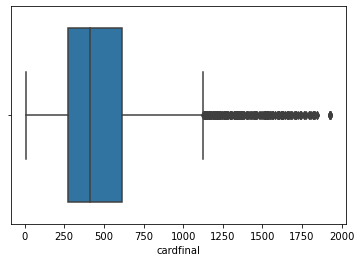

In [381]:
sns.boxplot(final2["cardfinal"])
plt.show

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

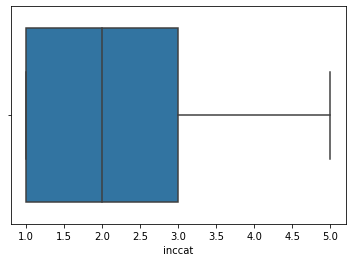

In [382]:
sns.boxplot(final2["inccat"])
plt.show

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


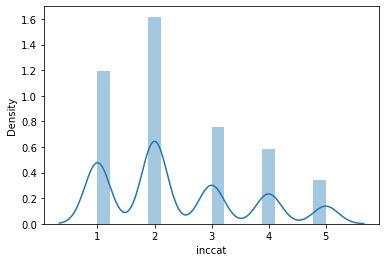

In [383]:
sns.distplot(final2["inccat"])
plt.show()

C:\Users\sarit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


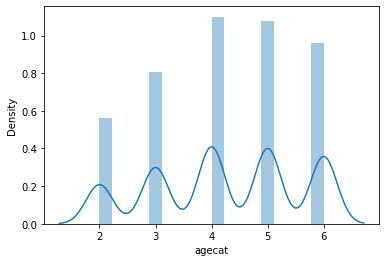

In [384]:
sns.distplot(final2["agecat"])
plt.show()

In [386]:
final2.columns

Index(['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'empcat', 'retire', 'inccat', 'debtinc', 'creddebt', 'othdebt', 'default', 'jobsat', 'marital', 'reside', 'pets', 'homeown', 'addresscat', 'cars', 'carown', 'carcatvalue', 'carbuy', 'commute', 'commutetime', 'reason', 'polcontrib', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'card2', 'card2type', 'card2benefit', 'card2fee', 'active', 'churn', 'longmon', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'internet', 'news', 'response_01', 'response_02', 'response_03', 'cardfinal', 'cardtenurecatfinal'], dtype='object')

In [389]:
final2

,region,townsize,gender,agecat,edcat,jobcat,union,empcat,retire,inccat,debtinc,creddebt,othdebt,default,jobsat,marital,reside,pets,homeown,addresscat,cars,carown,carcatvalue,carbuy,commute,commutetime,reason,polcontrib,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,active,churn,longmon,tollfree,equip,callcard,wireless,multline,internet,news,response_01,response_02,response_03,cardfinal,cardtenurecatfinal
0,1,2.0,1,2,3,1,1,1,0,2,11.1,1.200909,2.240091,1,1,0,3.0,0.0,0,1,2.0,1,1,0,8,22.0,9,0,3,1,1,0,5,3,1,0,0,1,6.50,1,1,1,0,1,0,0,0,1,0,149.46,4
1,5,5.0,0,2,4,2,0,1,0,1,18.6,1.222020,1.567980,1,1,0,2.0,6.0,1,1,2.0,1,1,0,1,29.0,9,0,2,4,1,0,4,1,3,0,1,0,8.90,0,1,1,1,1,4,1,0,0,0,77.54,4
2,3,4.0,1,6,2,2,0,5,0,2,9.9,0.928620,2.536380,0,4,1,3.0,3.0,1,5,3.0,1,1,1,4,24.0,2,0,2,1,4,0,4,1,3,0,0,0,28.40,0,0,1,0,1,0,1,0,0,0,359.97,10
3,4,3.0,0,2,3,2,0,1,0,1,5.7,0.022800,1.117200,1,2,1,5.0,0.0,1,2,3.0,1,1,1,1,38.0,9,0,2,1,4,0,3,2,4,0,1,0,6.00,0,0,1,0,1,2,1,1,0,0,359.41,4
4,2,2.0,0,3,3,2,0,1,0,1,1.7,0.214659,0.176341,0,1,1,4.0,0.0,0,2,1.0,0,1,1,6,32.0,9,0,4,2,1,0,1,3,2,0,1,0,3.05,1,0,1,1,0,3,0,0,1,0,507.83,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,2.0,0,6,1,1,0,5,0,5,8.0,7.934080,7.745920,0,1,0,1.0,4.0,1,4,1.0,1,3,0,5,21.0,9,1,1,3,3,0,3,3,4,0,0,0,34.10,0,0,1,0,0,0,1,0,0,0,1425.67,10
4996,3,3.0,0,5,2,1,0,3,0,4,15.0,3.336600,9.113400,1,5,0,1.0,1.0,1,3,2.0,1,3,1,4,26.0,9,0,3,4,4,0,5,1,2,0,1,0,10.40,1,0,1,1,0,0,0,0,0,0,366.35,8
4997,4,5.0,0,6,4,1,0,5,0,4,10.8,3.557520,8.106480,0,3,0,1.0,0.0,1,5,3.0,1,3,0,1,32.0,9,0,1,3,1,0,2,4,4,0,0,0,29.40,1,0,1,0,1,0,1,0,0,0,1527.75,10
4998,1,1.0,0,4,4,2,0,2,0,5,10.8,5.021352,15.390648,1,4,1,4.0,0.0,1,4,2.0,1,3,1,1,12.0,9,1,3,1,1,0,4,3,1,0,0,0,7.95,0,1,1,0,1,3,1,0,0,0,752.95,9


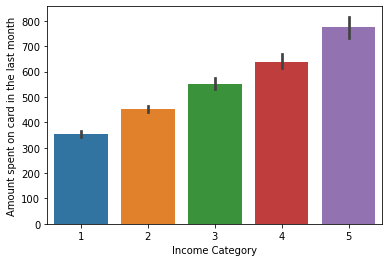

In [420]:
sns.barplot(x="inccat", y="cardfinal", data=final2, )
#x.set_xticklabels(rotation=45)
#x.set_axis_labels(25,25-49,50-74,75-124,125)
plt.xlabel("Income Category")
plt.ylabel("Amount spent on card in the last month")
plt.show()

[]

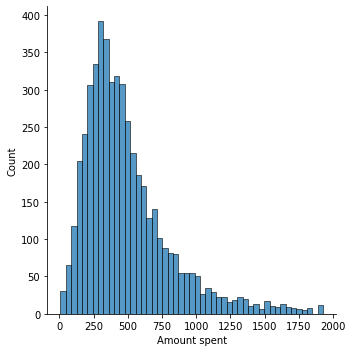

In [430]:
sns.displot(final2["cardfinal"])
plt.xlabel("Amount spent")
plt.plot()

In [435]:
final2["cardfinal"].min()

8.11

In [436]:
final2["cardfinal"].max()

1927.9370000000008

<AxesSubplot:xlabel='cardfinal', ylabel='Count'>

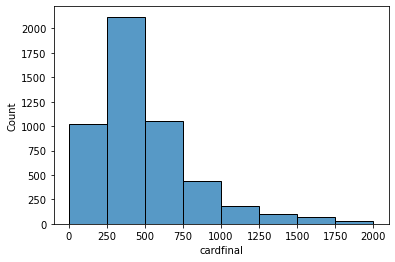

In [437]:
sns.histplot(final2["cardfinal"], bins=[0,250,500,750,1000,1250,1500,1750,2000])